# Project Summary

This Jupyter Notebook is focused on analyzing and modeling a dataset of used cars. The notebook includes data preprocessing, exploratory data analysis (EDA), feature engineering, and model training and evaluation. Below is a detailed description of each section and the corresponding code cells.

## Data Preprocessing and Exploration

1. **Importing Libraries and Loading Data**

   - Libraries such as `pandas`, `matplotlib.pyplot`, and `seaborn` are imported.
   - The dataset `used_cars.csv` is loaded into a DataFrame `df`.
   - Initial exploration of the dataset is performed using `head()`, `info()`, `describe()`, and `isnull().sum()` methods.

2. **Data Visualization**

   - Various plots are created to visualize the distribution of car prices, mileage, count of cars by brand and fuel type, and the relationship between car price and model year.
   - Histograms, count plots, scatter plots, and box plots are used for visualization.

3. **Handling Missing Values**

   - Missing values in the `fuel_type`, `accident`, and `clean_title` columns are filled with appropriate values.
   - The updated count of missing values is printed.

4. **Feature Engineering**
   - Encoding categorical variables such as `brand`, `model`, `fuel_type`, `transmission`, `ext_col`, and `int_col` using techniques like label encoding and one-hot encoding.
   - Creating new features such as `encoded_brand`, `engine_displacement`, and `color_changed`.
   - Standardizing numerical features using `StandardScaler`.

## Model Training and Evaluation

1. **Splitting Data**

   - The dataset is split into training and testing sets using `train_test_split`.

2. **Training Models**

   - Various regression models are trained, including `Ridge`, `ridgeCV`, `LinearRegression`, `RandomForestRegressor`, `LassoCV`, and `XGBRegressor`.
   - Recursive Feature Elimination (RFE) is used to select the best features for each model.

3. **Evaluating Models**

   - Models are evaluated using metrics such as Mean Squared Error (MSE) and R-squared (R²).
   - Residual plots, actual vs predicted plots, feature importance plots, error distribution plots, and learning curves are generated for each model.

4. **Handling Outliers**
   - Outliers in the `price` column are removed using Z-scores.

## Final Model Training and Evaluation

- The cleaned dataset is used to train and evaluate the models again, following the same process as before.

This notebook provides a comprehensive workflow for analyzing and modeling a used car dataset, including data preprocessing, visualization, feature engineering, and model evaluation.

## Handling Data

1. **Data Cleaning**

   - The `milage` column is cleaned by removing unwanted characters and converting it to a numerical format.
   - The `engine` column is processed to extract numerical values for engine displacement and the number of cylinders.

2. **Encoding and Standardization**
   - Categorical variables are encoded using one-hot encoding and mean encoding.
   - Numerical features are standardized using `StandardScaler` to ensure they have a mean of 0 and a standard deviation of 1.

## Impact of Removing Outliers

Removing outliers from the `price` column significantly improved the accuracy of the models. By filtering out data points with Z-scores beyond a threshold of 3, the dataset became more representative of the general trend, reducing the noise caused by extreme values. This led to better model performance, as indicated by improved evaluation metrics.

## Model Performance

The performance of different models before and after removing outliers is summarized below:

- **Ridge Regression**

  - Before: MSE = 878504764.4467131, R² = 0.52
  - After: MSE = 511764521.959076, R² = 0.62

- **RidgeCV**

  - Before: MSE = 878639941.3446958, R² = 0.52
  - After: MSE = 511598290.46433365, R² = 0.62

- **Linear Regression**

  - Before: MSE = 878654974.1379756, R² = 0.52
  - After: MSE = 511784636.2424409, R² = 0.62

- **Random Forest Regressor**

  - Before: MSE = 335863729.1024245, R² = 0.81
  - After: MSE = 203842098, R² = 0.85

- **LassoCV**

  - Before: MSE = 852003416.7752014, R² = 0.53
  - After: MSE = 511792234.8866373, R² = 0.62

- **XGBRegressor**
  - Before: MSE = 1036914082.5827103, R² = 0.43
  - After: MSE = 167383529.085204, R² = 0.88

The removal of outliers resulted in lower Mean Squared Error (MSE) and higher R-squared (R²) values across all models, indicating better fit and predictive accuracy.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_colwidth', None)
df = pd.read_csv('used_cars.csv')

print(df.head())
print(df.info())

print(df.describe(include='all'))

print(df.isnull().sum())


      brand                            model  model_year      milage  \
0      Ford  Utility Police Interceptor Base        2013  51,000 mi.   
1   Hyundai                     Palisade SEL        2021  34,742 mi.   
2     Lexus                    RX 350 RX 350        2022  22,372 mi.   
3  INFINITI                 Q50 Hybrid Sport        2015  88,900 mi.   
4      Audi        Q3 45 S line Premium Plus        2021   9,835 mi.   

       fuel_type                                                engine  \
0  E85 Flex Fuel  300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capability   
1       Gasoline                                  3.8L V6 24V GDI DOHC   
2       Gasoline                                        3.5 Liter DOHC   
3         Hybrid   354.0HP 3.5L V6 Cylinder Engine Gas/Electric Hybrid   
4       Gasoline                            2.0L I4 16V GDI DOHC Turbo   

        transmission                 ext_col int_col  \
0        6-Speed A/T                   Black   Black   
1  8-Speed

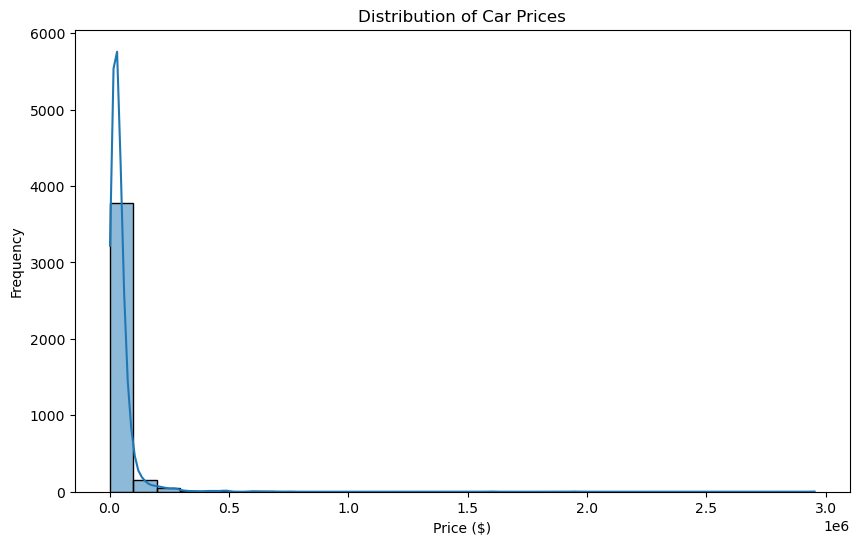

In [3]:

plt.figure(figsize=(10, 6))
sns.histplot(df['price'].str.replace(r'[\$,]', '', regex=True).astype(float), bins=30, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()


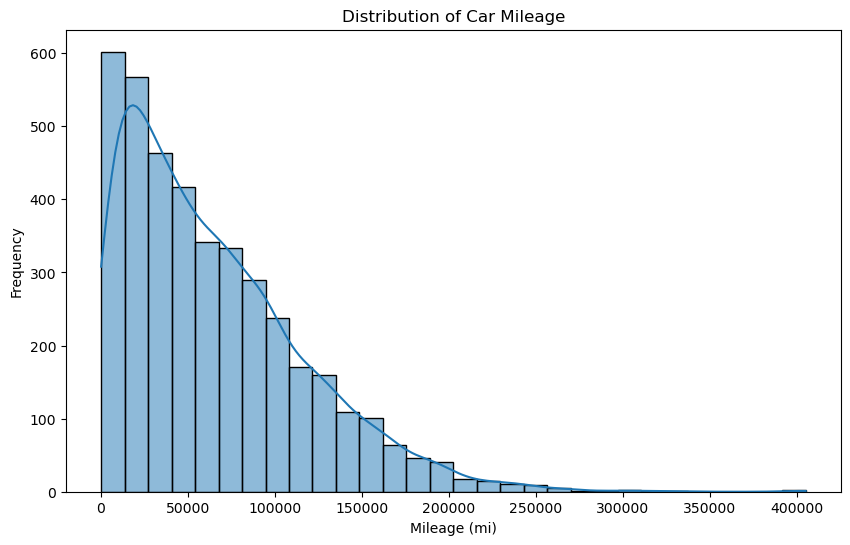

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(df['milage'].str.replace(r'[\, mi.]', '', regex=True).astype(float), bins=30, kde=True)
plt.title('Distribution of Car Mileage')
plt.xlabel('Mileage (mi)')
plt.ylabel('Frequency')
plt.show()


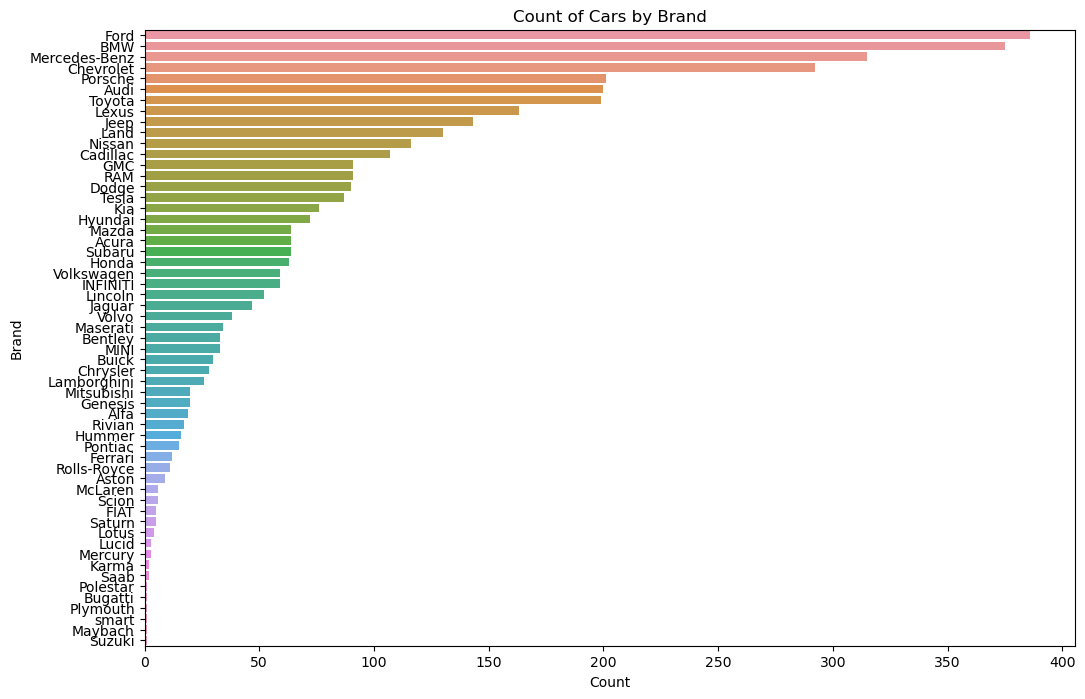

In [5]:
plt.figure(figsize=(12, 8))
sns.countplot(y='brand', data=df, order=df['brand'].value_counts().index)
plt.title('Count of Cars by Brand')
plt.xlabel('Count')
plt.ylabel('Brand')
plt.show()


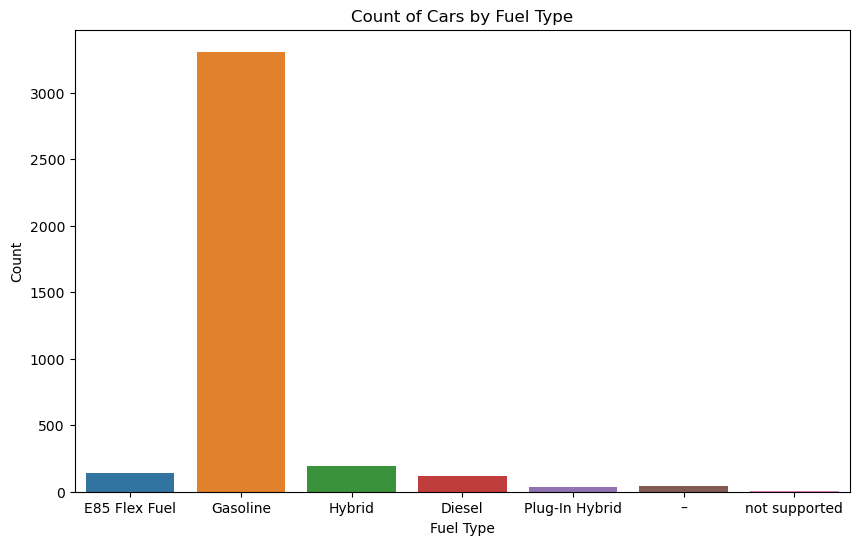

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(x='fuel_type', data=df)
plt.title('Count of Cars by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

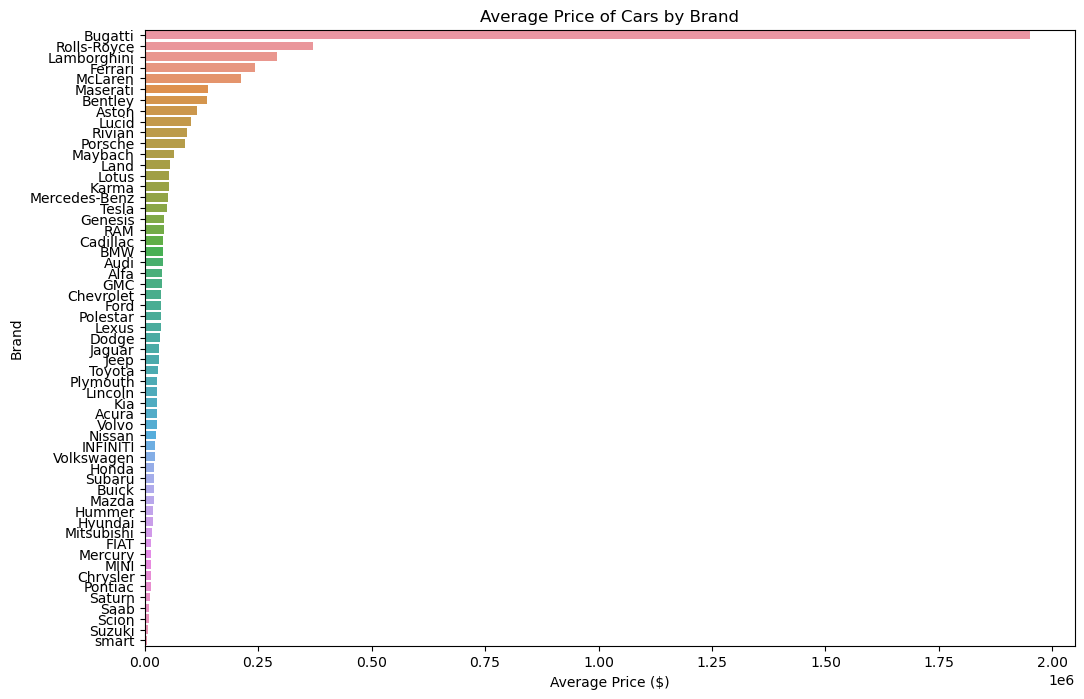

In [7]:
df['price'] = df['price'].str.replace(r'[\$,]', '', regex=True).astype(float)

plt.figure(figsize=(12, 8))
avg_price_by_brand = df.groupby('brand')['price'].mean().sort_values(ascending=False)
sns.barplot(x=avg_price_by_brand.values, y=avg_price_by_brand.index)
plt.title('Average Price of Cars by Brand')
plt.xlabel('Average Price ($)')
plt.ylabel('Brand')
plt.show()

In [8]:
null_values = df.isnull().sum()
print(null_values)

brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
dtype: int64


In [9]:
df['fuel_type'].fillna(df['fuel_type'].mode()[0], inplace=True)

df['accident'].fillna('None reported', inplace=True)

df['clean_title'].fillna('Unknown', inplace=True)

null_values_updated = df.isnull().sum()
print(null_values_updated)

brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64


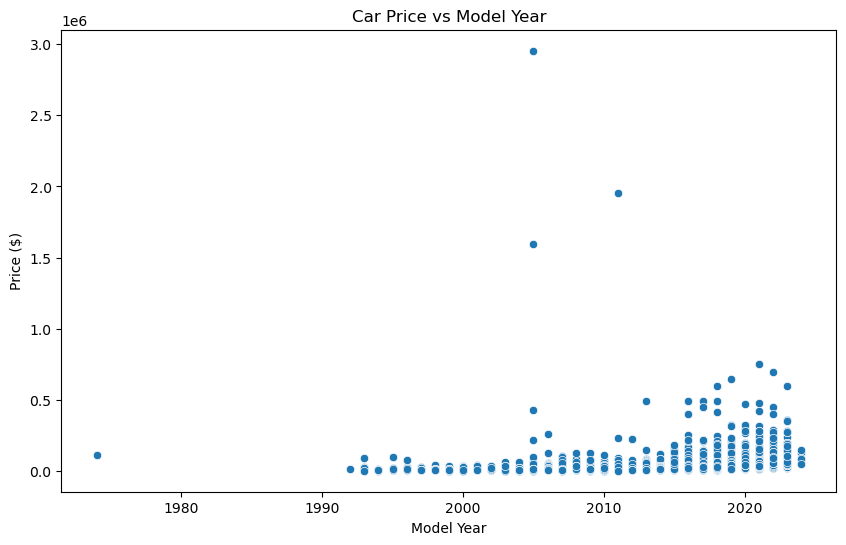

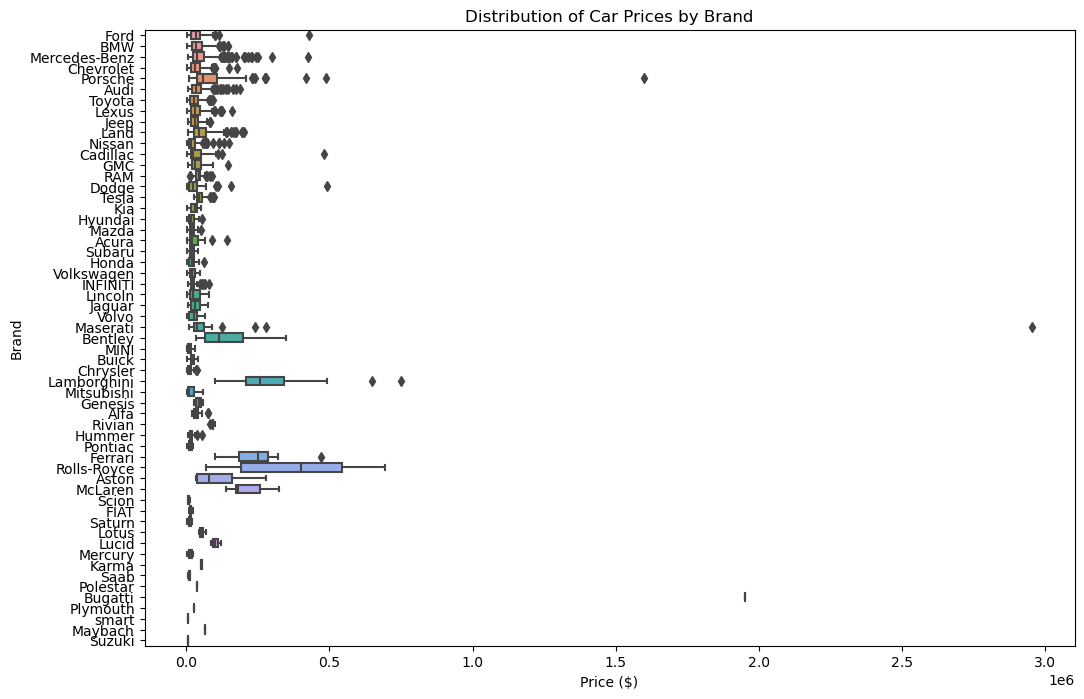

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='model_year', y='price', data=df)
plt.title('Car Price vs Model Year')
plt.xlabel('Model Year')
plt.ylabel('Price ($)')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(y='brand', x='price', data=df, order=df['brand'].value_counts().index)
plt.title('Distribution of Car Prices by Brand')
plt.xlabel('Price ($)')
plt.ylabel('Brand')
plt.show()


            model_year     price
model_year    1.000000  0.199496
price         0.199496  1.000000


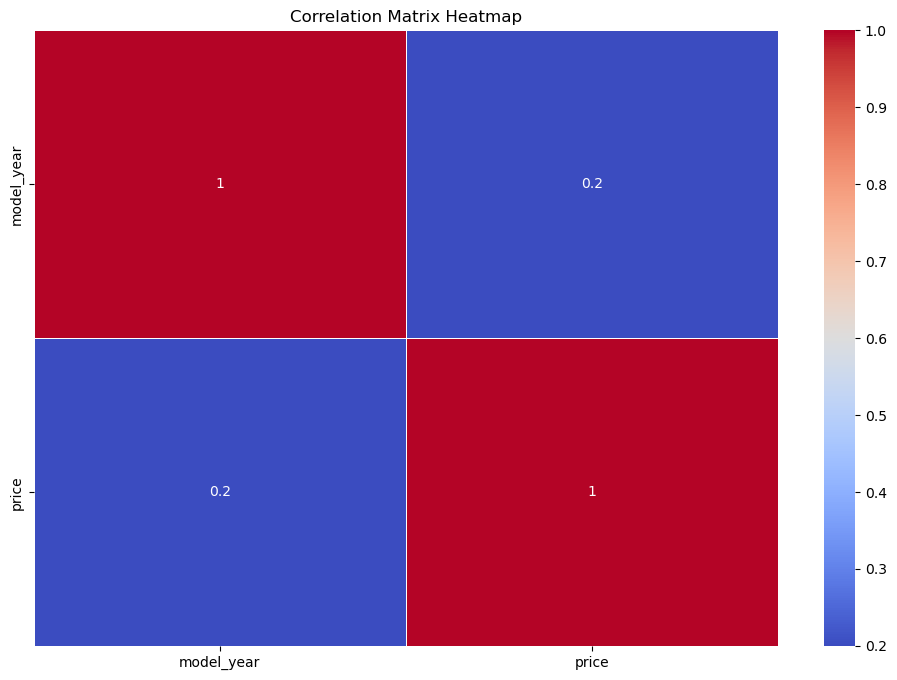

In [11]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

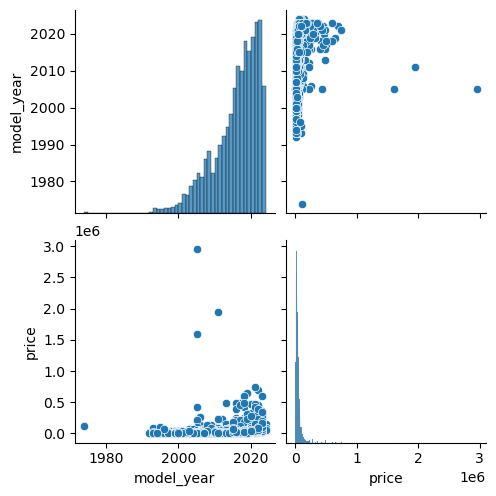

In [12]:
import warnings
warnings.filterwarnings('ignore')
sns.pairplot(df.select_dtypes(include=['float64', 'int64', 'object']))
plt.show()

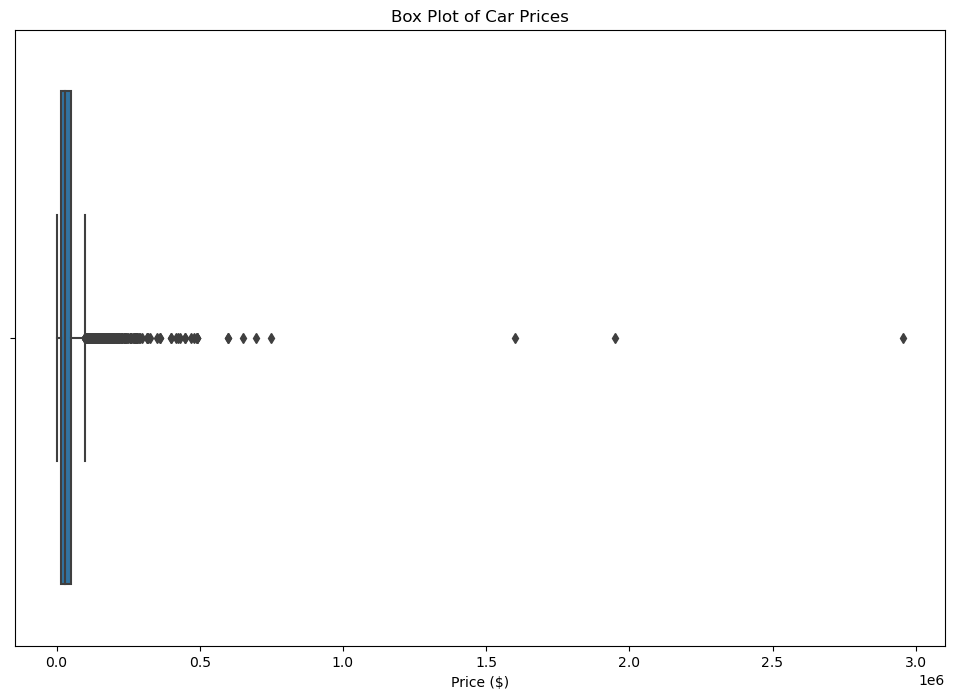

In [13]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='price', data=df)
plt.title('Box Plot of Car Prices')
plt.xlabel('Price ($)')
plt.show()

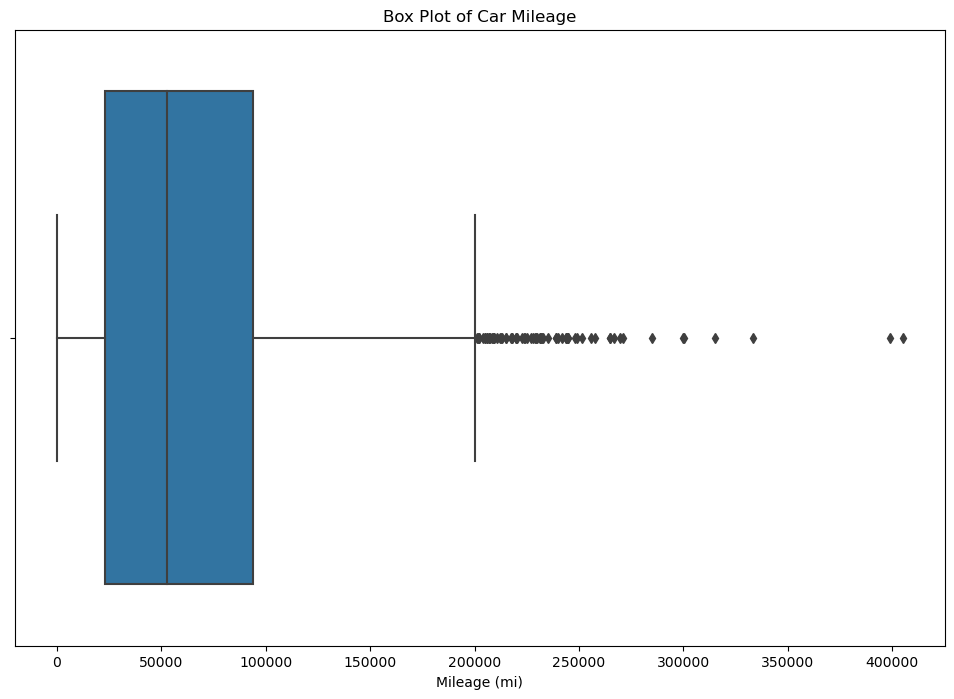

In [14]:
plt.figure(figsize=(12, 8))
sns.boxplot(x=df['milage'].str.replace(r'[\, mi.]', '', regex=True).astype(float))
plt.title('Box Plot of Car Mileage')
plt.xlabel('Mileage (mi)')
plt.show()

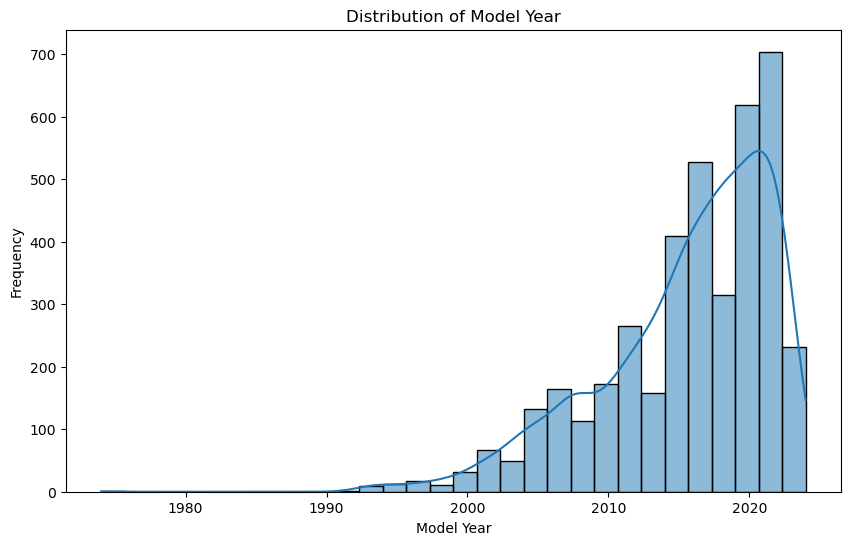

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(df['model_year'], bins=30, kde=True)
plt.title('Distribution of Model Year')
plt.xlabel('Model Year')
plt.ylabel('Frequency')
plt.show()

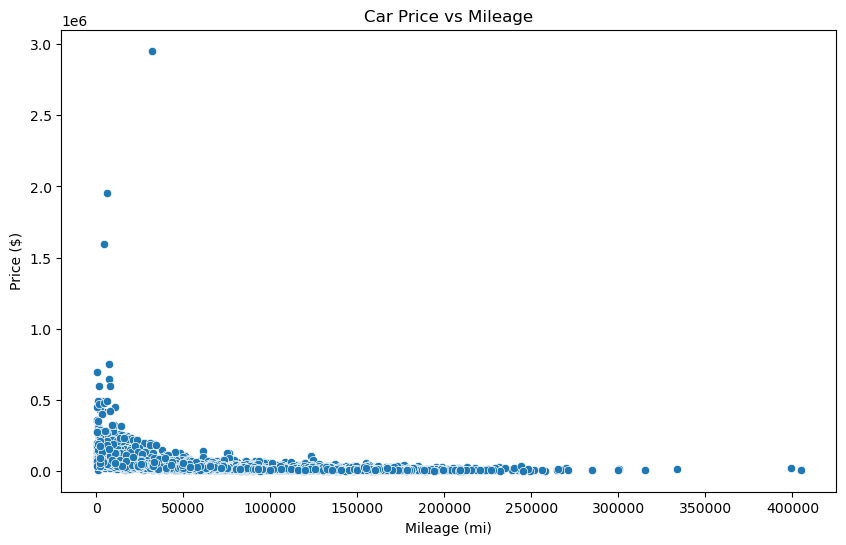

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['milage'].str.replace(r'[\, mi.]', '', regex=True).astype(float), y='price', data=df)
plt.title('Car Price vs Mileage')
plt.xlabel('Mileage (mi)')
plt.ylabel('Price ($)')
plt.show()

In [17]:
df['brand'].value_counts()

brand
Ford             386
BMW              375
Mercedes-Benz    315
Chevrolet        292
Porsche          201
Audi             200
Toyota           199
Lexus            163
Jeep             143
Land             130
Nissan           116
Cadillac         107
GMC               91
RAM               91
Dodge             90
Tesla             87
Kia               76
Hyundai           72
Mazda             64
Acura             64
Subaru            64
Honda             63
Volkswagen        59
INFINITI          59
Lincoln           52
Jaguar            47
Volvo             38
Maserati          34
Bentley           33
MINI              33
Buick             30
Chrysler          28
Lamborghini       26
Mitsubishi        20
Genesis           20
Alfa              19
Rivian            17
Hummer            16
Pontiac           15
Ferrari           12
Rolls-Royce       11
Aston              9
McLaren            6
Scion              6
FIAT               5
Saturn             5
Lotus              4
Lucid  

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
encoder = LabelEncoder()

In [20]:
encoded_brands = encoder.fit_transform(df['brand'])

In [21]:
print(encoded_brands)

[14 19 27 ... 43 14  4]


In [22]:
# encode brind by the mean price of each brand
df['encoded_brand']= df['brand'].map(df.groupby('brand')['price'].mean())

In [23]:
df

brand                            model  model_year      milage  \
0         Ford  Utility Police Interceptor Base        2013  51,000 mi.   
1      Hyundai                     Palisade SEL        2021  34,742 mi.   
2        Lexus                    RX 350 RX 350        2022  22,372 mi.   
3     INFINITI                 Q50 Hybrid Sport        2015  88,900 mi.   
4         Audi        Q3 45 S line Premium Plus        2021   9,835 mi.   
...        ...                              ...         ...         ...   
4004   Bentley             Continental GT Speed        2023     714 mi.   
4005      Audi             S4 3.0T Premium Plus        2022  10,900 mi.   
4006   Porsche                           Taycan        2022   2,116 mi.   
4007      Ford                     F-150 Raptor        2020  33,000 mi.   
4008       BMW                     X3 xDrive30i        2020  43,000 mi.   

          fuel_type                                                engine  \
0     E85 Flex Fuel  300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capability   
1          Gasoline                                  3.8L V6 24V GDI DOHC   
2          Gasoline                                        3.5 Liter DOHC   
3            Hybrid   354.0HP 3.5L V6 Cylinder Engine Gas/Electric Hybrid   
4          Gasoline                            2.0L I4 16V GDI DOHC Turbo   
...             ...                                                   ...   
4004       Gasoline                      6.0L W12 48V PDI DOHC Twin Turbo   
4005       Gasoline         349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel   
4006       Gasoline                                              Electric   
4007       Gasoline         450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel   
4008       Gasoline          248.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   

                           transmission                 ext_col  int_col  \
0                           6-Speed A/T                   Black    Black   
1                     8-Speed Automatic         Moonlight Cloud     Gray   
2                             Automatic                    Blue    Black   
3                           7-Speed A/T                   Black    Black   
4                     8-Speed Automatic  Glacier White Metallic    Black   
...                                 ...                     ...      ...   
4004  8-Speed Automatic with Auto-Shift                   C / C  Hotspur   
4005     Transmission w/Dual Shift Mode                   Black    Black   
4006                          Automatic                   Black    Black   
4007                                A/T                    Blue    Black   
4008                                A/T                    Gray    Brown   

                                    accident clean_title     price  \
0     At least 1 accident or damage reported         Yes   10300.0   
1     At least 1 accident or damage reported         Yes   38005.0   
2                              None reported     Unknown   54598.0   
3                              None reported         Yes   15500.0   
4                              None reported     Unknown   34999.0   
...                                      ...         ...       ...   
4004                           None reported         Yes  349950.0   
4005                           None reported         Yes   53900.0   
4006                           None reported     Unknown   90998.0   
4007                           None reported         Yes   62999.0   
4008  At least 1 accident or damage reported         Yes   40000.0   

      encoded_brand  
0      36240.880829  
1      18946.875000  
2      35668.521472  
3      22927.644068  
4      39907.430000  
...             ...  
4004  137553.545455  
4005   39907.430000  
4006   88751.298507  
4007   36240.880829  
4008   41072.309333  

[4009 rows x 13 columns]

In [24]:
df['brand_id'] = df['brand'].astype('category').cat.codes
df['model_id'] = df['model'].astype('category').cat.codes
df['fuel_type_id'] = df['fuel_type'].astype('category').cat.codes

In [25]:
df.head()

brand                            model  model_year      milage  \
0      Ford  Utility Police Interceptor Base        2013  51,000 mi.   
1   Hyundai                     Palisade SEL        2021  34,742 mi.   
2     Lexus                    RX 350 RX 350        2022  22,372 mi.   
3  INFINITI                 Q50 Hybrid Sport        2015  88,900 mi.   
4      Audi        Q3 45 S line Premium Plus        2021   9,835 mi.   

       fuel_type                                                engine  \
0  E85 Flex Fuel  300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capability   
1       Gasoline                                  3.8L V6 24V GDI DOHC   
2       Gasoline                                        3.5 Liter DOHC   
3         Hybrid   354.0HP 3.5L V6 Cylinder Engine Gas/Electric Hybrid   
4       Gasoline                            2.0L I4 16V GDI DOHC Turbo   

        transmission                 ext_col int_col  \
0        6-Speed A/T                   Black   Black   
1  8-Speed Automatic         Moonlight Cloud    Gray   
2          Automatic                    Blue   Black   
3        7-Speed A/T                   Black   Black   
4  8-Speed Automatic  Glacier White Metallic   Black   

                                 accident clean_title    price  encoded_brand  \
0  At least 1 accident or damage reported         Yes  10300.0   36240.880829   
1  At least 1 accident or damage reported         Yes  38005.0   18946.875000   
2                           None reported     Unknown  54598.0   35668.521472   
3                           None reported         Yes  15500.0   22927.644068   
4                           None reported     Unknown  34999.0   39907.430000   

   brand_id  model_id  fuel_type_id  
0        14      1743             1  
1        19      1182             2  
2        27      1325             2  
3        20      1242             3  
4         3      1225             2

In [26]:
df.loc[df['transmission'].str.contains('A/T', na=False), 'transmission'] = 'A/T'
df.loc[df['transmission'].str.contains('Automatic', na=False), 'transmission'] = 'A/T'
df.loc[df['transmission'].str.contains('Transmission Overdrive Switch', na=False), 'transmission'] = 'A/T'
df.loc[df['transmission'].str.contains('M/T', na=False), 'transmission'] = 'M/T'
df.loc[df['transmission'].str.contains('Manual', na=False), 'transmission'] = 'M/T'
df.loc[df['transmission'].str.contains('Manual', na=False), 'transmission'] = 'M/T'
df.loc[df['transmission'].str.contains('CVT', na=False), 'transmission'] = 'CVT'

In [27]:
df['transmission'].value_counts()

transmission
A/T                               3155
Transmission w/Dual Shift Mode     398
M/T                                372
CVT                                 63
Variable                             4
–                                    4
2                                    3
F                                    2
8-SPEED AT                           1
Auto, 6-Spd w/CmdShft                1
6-Speed                              1
Single-Speed Fixed Gear              1
7-Speed                              1
6 Speed At/Mt                        1
SCHEDULED FOR OR IN PRODUCTION       1
6 Speed Mt                           1
Name: count, dtype: int64

In [28]:
df[df['transmission'].map(df['transmission'].value_counts()) < 5]

brand                          model  model_year       milage  \
5           Acura                       ILX 2.4L        2016  136,397 mi.   
165         Lexus        NX 350 F SPORT Handling        2023      820 mi.   
216         Acura  Integra w/A-Spec Tech Package        2023    3,574 mi.   
269         Acura           TLX w/A-Spec Package        2022   14,896 mi.   
476         Acura       MDX w/Technology Package        2023    3,415 mi.   
516         Acura       MDX w/Technology Package        2022   30,177 mi.   
536       Porsche                  911 Carrera S        2017   16,701 mi.   
546          Land    Rover Range Rover Sport HSE        2013   81,648 mi.   
855          Ford                         Bronco        1974    6,217 mi.   
916       Porsche                 911 Carrera 4S        2018   31,678 mi.   
936        Nissan                       Rogue SL        2016   97,726 mi.   
1066        Lexus       RX 450h F SPORT Handling        2021   31,365 mi.   
1236       Toyota                 Tacoma TRD Pro        2019   40,698 mi.   
1241      Porsche                   Taycan Turbo        2020   21,028 mi.   
1356  Lamborghini             Aventador SVJ Base        2021    6,987 mi.   
1615  Rolls-Royce                        Phantom        2023    1,560 mi.   
2100       Toyota                    Tacoma Base        2020   27,256 mi.   
2125       Subaru                Impreza Premium        2022   10,419 mi.   
2381        Acura                RDX PMC Edition        2021   44,457 mi.   
2620          BMW                   X6 xDrive40i        2021   72,903 mi.   
3206       Toyota               Tacoma TRD Sport        2020   41,199 mi.   

     fuel_type  \
5     Gasoline   
165   Gasoline   
216   Gasoline   
269   Gasoline   
476   Gasoline   
516   Gasoline   
536   Gasoline   
546   Gasoline   
855          –   
916   Gasoline   
936   Gasoline   
1066    Hybrid   
1236  Gasoline   
1241  Gasoline   
1356  Gasoline   
1615         –   
2100  Gasoline   
2125  Gasoline   
2381  Gasoline   
2620    Hybrid   
3206  Gasoline   

                                                               engine  \
5                                                           2.4 Liter   
165                                                         2.4 Liter   
216                                                   1.5 Liter Turbo   
269                                              2.0 Liter DOHC Turbo   
476                                                    3.5 Liter SOHC   
516                                           3.5L 24V SOHC I-VTEC V6   
536                                                         3.0 Liter   
546   5L V-8 gasoline direct injection, DOHC, variable valve control,   
855                                                                 –   
916                                                         3.0 Liter   
936   2.5L I-4 DOHC, variable valve control, regular unleaded, engine   
1066                                                   3.5 Liter DOHC   
1236                                             3.5L V6 24V PDI DOHC   
1241                                          Dual AC Electric Motors   
1356                                           6.5L V12 48V MPFI DOHC   
1615                                                                –   
2100                                                        3.5 Liter   
2125  2L H-4 gasoline direct injection, DOHC, variable valve control,   
2381                                                  2.0 Liter Turbo   
2620                                                  3.0 Liter Turbo   
3206                                                        3.5 Liter   

                        transmission                  ext_col  \
5                                  F                   Silver   
165                       8-SPEED AT                    Black   
216                         Variable                Apex Blue   
269                                2    Lunar Silver 

In [29]:
df.drop(df[df['transmission'].map(df['transmission'].value_counts()) < 5].index, inplace=True)

In [30]:
df['transmission'].value_counts()

transmission
A/T                               3155
Transmission w/Dual Shift Mode     398
M/T                                372
CVT                                 63
Name: count, dtype: int64

In [31]:
df['transmission'].isna().any()

False

In [32]:
# for i in df.columns:
#     print(f'{i} Values: ', df[i].value_counts())

In [33]:
# One-hot encode the 'transmission' column
transmission_encoded = pd.get_dummies(df['transmission'], prefix='transmission', dtype=int)

# Concatenate the original DataFrame with the encoded DataFrame
df = df.join(transmission_encoded)

In [34]:
df.tail(10)

brand                       model  model_year       milage  \
3999            BMW                X6 xDrive40i        2020   34,000 mi.   
4000         Subaru  Ascent Touring 7-Passenger        2021   32,250 mi.   
4001     Volkswagen                   Routan SE        2011  194,000 mi.   
4002  Mercedes-Benz           AMG GLS 63 4MATIC        2023    2,000 mi.   
4003  Mercedes-Benz        E-Class E 300 4MATIC        2018   53,705 mi.   
4004        Bentley        Continental GT Speed        2023      714 mi.   
4005           Audi        S4 3.0T Premium Plus        2022   10,900 mi.   
4006        Porsche                      Taycan        2022    2,116 mi.   
4007           Ford                F-150 Raptor        2020   33,000 mi.   
4008            BMW                X3 xDrive30i        2020   43,000 mi.   

     fuel_type                                                        engine  \
3999  Gasoline         335.0HP 3.0L Straight 6 Cylinder Engine Gasoline Fuel   
4000  Gasoline                  260.0HP 2.4L 4 Cylinder Engine Gasoline Fuel   
4001  Gasoline                 283.0HP 3.6L V6 Cylinder Engine Gasoline Fuel   
4002    Hybrid  603.0HP 4.0L 8 Cylinder Engine Gasoline/Mild Electric Hybrid   
4003  Gasoline                  241.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   
4004  Gasoline                              6.0L W12 48V PDI DOHC Twin Turbo   
4005  Gasoline                 349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel   
4006  Gasoline                                                      Electric   
4007  Gasoline                 450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel   
4008  Gasoline                  248.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   

                        transmission ext_col  int_col  \
3999                             A/T   White    Brown   
4000                             A/T   Black    Black   
4001  Transmission w/Dual Shift Mode   Black     Gray   
4002                             A/T    Gray    Beige   
4003                             A/T   Black    Black   
4004                             A/T   C / C  Hotspur   
4005  Transmission w/Dual Shift Mode   Black    Black   
4006                             A/T   Black    Black   
4007                             A/T    Blue    Black   
4008                             A/T    Gray    Brown   

                                    accident clean_title     price  \
3999                           None reported         Yes   59335.0   
4000  At least 1 accident or damage reported         Yes   36000.0   
4001  At least 1 accident or damage reported         Yes    3500.0   
4002                           None reported         Yes  175000.0   
4003  At least 1 accident or damage reported         Yes   25900.0   
4004                           None reported         Yes  349950.0   
4005                           None reported         Yes   53900.0   
4006                           None reported     Unknown   90998.0   
4007                           None reported         Yes   62999.0   
4008  At least 1 accident or damage reported         Yes   40000.0   

      encoded_brand  brand_id  model_id  fuel_type_id  transmission_A/T  \
3999   41072.309333         4      1811             2                 1   
4000   21495.156250        50       273             2                 1   
4001   22067.966102        54      1373             2                 0   
4002   52075.765079        36       229             3                 1   
4003   52075.765079        36       548             2                 1   
4004  137553.545455         5       484             2                 1   
4005   39907.430000         3      1464             2                 0   
4006   88751.298507        43      1677             2                 1   
4007   36240.880829        14       666             2                 1   
4008   41072.309333         4      1790             2                 1   

      transmission_CVT  transmission_M/T  \
3999                 0     

In [35]:
df['milage'] = df['milage'].str.replace(r'[\,\smi.]+', '', regex=True)

In [36]:
df.head()

brand                            model  model_year milage  \
0      Ford  Utility Police Interceptor Base        2013  51000   
1   Hyundai                     Palisade SEL        2021  34742   
2     Lexus                    RX 350 RX 350        2022  22372   
3  INFINITI                 Q50 Hybrid Sport        2015  88900   
4      Audi        Q3 45 S line Premium Plus        2021   9835   

       fuel_type                                                engine  \
0  E85 Flex Fuel  300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capability   
1       Gasoline                                  3.8L V6 24V GDI DOHC   
2       Gasoline                                        3.5 Liter DOHC   
3         Hybrid   354.0HP 3.5L V6 Cylinder Engine Gas/Electric Hybrid   
4       Gasoline                            2.0L I4 16V GDI DOHC Turbo   

  transmission                 ext_col int_col  \
0          A/T                   Black   Black   
1          A/T         Moonlight Cloud    Gray   
2          A/T                    Blue   Black   
3          A/T                   Black   Black   
4          A/T  Glacier White Metallic   Black   

                                 accident clean_title    price  encoded_brand  \
0  At least 1 accident or damage reported         Yes  10300.0   36240.880829   
1  At least 1 accident or damage reported         Yes  38005.0   18946.875000   
2                           None reported     Unknown  54598.0   35668.521472   
3                           None reported         Yes  15500.0   22927.644068   
4                           None reported     Unknown  34999.0   39907.430000   

   brand_id  model_id  fuel_type_id  transmission_A/T  transmission_CVT  \
0        14      1743             1                 1                 0   
1        19      1182             2                 1                 0   
2        27      1325             2                 1                 0   
3        20      1242             3                 1                 0   
4         3      1225             2                 1                 0   

   transmission_M/T  transmission_Transmission w/Dual Shift Mode  
0                 0                                            0  
1                 0                                            0  
2                 0                                            0  
3                 0                                            0  
4                 0                                            0

In [37]:
df['engine'].str.extract(r'(\d+\.\d+)\s*(L|Liters?)?')[0].astype('float64').isna().sum()

98

In [38]:
# So many null, ignore
df['engine'].str.extract(r'(\d+)\s*Cylinders?|V(\d+)').apply(lambda x: x[0] if pd.notna(x[0]) else (x[1] if pd.notna(x[1]) else None), axis=1).astype(float).isna().sum()

604

In [39]:
df['engine_displacement'] = df['engine'].str.extract(r'(\d+\.\d+)(?=\s*L| Liter)')[0].astype(float)
df['engine_displacement'].fillna(df['engine_displacement'].mean(), inplace=True)

In [40]:
df['engine_displacement'].isna().sum()

0

In [41]:
df.head()

brand                            model  model_year milage  \
0      Ford  Utility Police Interceptor Base        2013  51000   
1   Hyundai                     Palisade SEL        2021  34742   
2     Lexus                    RX 350 RX 350        2022  22372   
3  INFINITI                 Q50 Hybrid Sport        2015  88900   
4      Audi        Q3 45 S line Premium Plus        2021   9835   

       fuel_type                                                engine  \
0  E85 Flex Fuel  300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capability   
1       Gasoline                                  3.8L V6 24V GDI DOHC   
2       Gasoline                                        3.5 Liter DOHC   
3         Hybrid   354.0HP 3.5L V6 Cylinder Engine Gas/Electric Hybrid   
4       Gasoline                            2.0L I4 16V GDI DOHC Turbo   

  transmission                 ext_col int_col  \
0          A/T                   Black   Black   
1          A/T         Moonlight Cloud    Gray   
2          A/T                    Blue   Black   
3          A/T                   Black   Black   
4          A/T  Glacier White Metallic   Black   

                                 accident  ...    price  encoded_brand  \
0  At least 1 accident or damage reported  ...  10300.0   36240.880829   
1  At least 1 accident or damage reported  ...  38005.0   18946.875000   
2                           None reported  ...  54598.0   35668.521472   
3                           None reported  ...  15500.0   22927.644068   
4                           None reported  ...  34999.0   39907.430000   

   brand_id  model_id  fuel_type_id  transmission_A/T  transmission_CVT  \
0        14      1743             1                 1                 0   
1        19      1182             2                 1                 0   
2        27      1325             2                 1                 0   
3        20      1242             3                 1                 0   
4         3      1225             2                 1                 0   

   transmission_M/T  transmission_Transmission w/Dual Shift Mode  \
0                 0                                            0   
1                 0                                            0   
2                 0                                            0   
3                 0                                            0   
4                 0                                            0   

   engine_displacement  
0                  3.7  
1                  3.8  
2                  3.5  
3                  3.5  
4                  2.0  

[5 rows x 21 columns]

In [42]:
df['ext_col'].value_counts()

ext_col
Black                       903
White                       815
Gray                        496
Silver                      372
Blue                        349
                           ... 
Anthracite Blue Metallic      1
Moonlight Cloud               1
Silver Mist                   1
Cirrus Silver Metallic        1
C / C                         1
Name: count, Length: 314, dtype: int64

In [43]:
from sklearn.model_selection import StratifiedKFold

In [44]:
ext_col_encoder = df.groupby('ext_col')['price'].mean()
int_col_encoder = df.groupby('int_col')['price'].mean()

In [45]:
df['ext_col_encoded'] = df['ext_col'].map(ext_col_encoder)
df['int_col_encoded'] = df['int_col'].map(int_col_encoder)

In [46]:
df['color_changed'] = df['int_col'] == df['ext_col']
df['color_changed'] = df['color_changed'].astype(int)

In [47]:
df.head()

brand                            model  model_year milage  \
0      Ford  Utility Police Interceptor Base        2013  51000   
1   Hyundai                     Palisade SEL        2021  34742   
2     Lexus                    RX 350 RX 350        2022  22372   
3  INFINITI                 Q50 Hybrid Sport        2015  88900   
4      Audi        Q3 45 S line Premium Plus        2021   9835   

       fuel_type                                                engine  \
0  E85 Flex Fuel  300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capability   
1       Gasoline                                  3.8L V6 24V GDI DOHC   
2       Gasoline                                        3.5 Liter DOHC   
3         Hybrid   354.0HP 3.5L V6 Cylinder Engine Gas/Electric Hybrid   
4       Gasoline                            2.0L I4 16V GDI DOHC Turbo   

  transmission                 ext_col int_col  \
0          A/T                   Black   Black   
1          A/T         Moonlight Cloud    Gray   
2          A/T                    Blue   Black   
3          A/T                   Black   Black   
4          A/T  Glacier White Metallic   Black   

                                 accident  ... model_id  fuel_type_id  \
0  At least 1 accident or damage reported  ...     1743             1   
1  At least 1 accident or damage reported  ...     1182             2   
2                           None reported  ...     1325             2   
3                           None reported  ...     1242             3   
4                           None reported  ...     1225             2   

   transmission_A/T  transmission_CVT  transmission_M/T  \
0                 1                 0                 0   
1                 1                 0                 0   
2                 1                 0                 0   
3                 1                 0                 0   
4                 1                 0                 0   

   transmission_Transmission w/Dual Shift Mode  engine_displacement  \
0                                            0                  3.7   
1                                            0                  3.8   
2                                            0                  3.5   
3                                            0                  3.5   
4                                            0                  2.0   

   ext_col_encoded  int_col_encoded  color_changed  
0     40945.471761     43622.916873              1  
1     38005.000000     27526.453390              0  
2     38715.865330     43622.916873              0  
3     40945.471761     43622.916873              1  
4     34999.000000     43622.916873              0  

[5 rows x 24 columns]

In [48]:
df['accident'].replace({
    'None reported':0,
    'At least 1 accident or damage reported': 1
}, inplace=True)

In [49]:
df['clean_title'].replace({
    'Unknown': 0,
    'Yes': 1
}, inplace=True)

In [50]:
df['clean_title'].head()

0    1
1    1
2    0
3    1
4    0
Name: clean_title, dtype: int64

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
std_scaler = StandardScaler()
df[['milage', 'encoded_brand', 'brand_id', 'fuel_type_id', 'ext_col_encoded', 'int_col_encoded']] = std_scaler.fit_transform(df[['milage', 'encoded_brand','brand_id', 'fuel_type_id', 'ext_col_encoded', 'int_col_encoded']])

In [53]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score,accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split

In [54]:
X = df.drop(
    columns=['price', 'brand', 'model', 'model_year', 'fuel_type', 'engine', 'transmission',
             'ext_col', 'int_col', 'transmission_A/T',
             'transmission_M/T', 'ext_col_encoded'])
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [55]:
X.head()

milage  accident  clean_title  encoded_brand  brand_id  model_id  \
0 -0.265244         1            1      -0.176362 -0.588477      1743   
1 -0.575986         1            1      -0.548941 -0.282723      1182   
2 -0.812416         0            0      -0.188693  0.206484      1325   
3  0.459146         0            1      -0.463180 -0.221572      1242   
4 -1.052039         0            0      -0.097370 -1.261135      1225   

   fuel_type_id  transmission_CVT  \
0     -1.587590                 0   
1     -0.026231                 0   
2     -0.026231                 0   
3      1.535127                 0   
4     -0.026231                 0   

   transmission_Transmission w/Dual Shift Mode  engine_displacement  \
0                                            0                  3.7   
1                                            0                  3.8   
2                                            0                  3.5   
3                                            0                  3.5   
4                                            0                  2.0   

   int_col_encoded  color_changed  
0        -0.022280              1  
1        -0.645862              0  
2        -0.022280              0  
3        -0.022280              1  
4        -0.022280              0

In [56]:
X.isna().any()

milage                                         False
accident                                       False
clean_title                                    False
encoded_brand                                  False
brand_id                                       False
model_id                                       False
fuel_type_id                                   False
transmission_CVT                               False
transmission_Transmission w/Dual Shift Mode    False
engine_displacement                            False
int_col_encoded                                False
color_changed                                  False
dtype: bool

In [57]:
rg = Ridge()

In [58]:
rg.fit(X_train, y_train)

Ridge()

In [59]:
y_pred = rg.predict(X_test)

In [60]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 872881152.5663787


In [61]:
from sklearn.linear_model import LinearRegression

In [62]:
r2 = r2_score(y_test, y_pred)
print(f'R-Squared (R²): {r2}')

R-Squared (R²): 0.5212190950603047


In [63]:
lr = LinearRegression()

In [64]:
lr.fit(X_train, y_train)

LinearRegression()

In [65]:
lr_y_pred = lr.predict(X_test)

In [66]:
lr_mse = mean_squared_error(y_test, lr_y_pred)
print(f'Mean Squared Error (MSE): {lr_mse}')

Mean Squared Error (MSE): 873022475.0811979


In [67]:
lr_r2 = r2_score(y_test, lr_y_pred)
print(f'R-Squared (R²): {lr_r2}')

R-Squared (R²): 0.5211415787554394


In [68]:
import seaborn as sn

In [69]:
from sklearn.ensemble import RandomForestRegressor

In [70]:
rfr = RandomForestRegressor()

In [71]:
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [142]:
rfr_pred = rfr.predict(X_test)

In [146]:
rfr_mse = mean_squared_error(y_test, rfr_pred)
print(f'Mean Squared Error (MSE): {rfr_mse}')

Mean Squared Error (MSE): 771149901.7696062


In [148]:
rfr_r2 = r2_score(y_test, rfr_pred)
print(f'R2 Score using Random Forest Regression: {rfr_r2}')

R2 Score using Random Forest Regression: 0.5770193379386408


In [150]:
from sklearn.linear_model import LassoCV

In [152]:
lscv = LassoCV()
lscv.fit(X_train, y_train)
lscv_pred = lscv.predict(X_test)

In [154]:
lscv_mse = mean_squared_error(y_test, lscv_pred)
print(f'Mean Squared Error (MSE): {lscv_mse}')

Mean Squared Error (MSE): 855505911.1863111


In [156]:
lscv_r2 = r2_score(y_test, lscv_pred)
print(f'R2 Score using Random Forest Regression: {lscv_r2}')

R2 Score using Random Forest Regression: 0.5307495262845736


In [158]:
from xgboost import XGBRegressor

In [160]:
clf = XGBRegressor(tree_method="hist", early_stopping_rounds=2)

clf.fit(X_train, y_train, eval_set=[(X_test, y_test)])

[0]	validation_0-rmse:32339.24097
[1]	validation_0-rmse:28839.17759
[2]	validation_0-rmse:25272.70339
[3]	validation_0-rmse:23847.25635
[4]	validation_0-rmse:22784.46456
[5]	validation_0-rmse:22240.44485
[6]	validation_0-rmse:21911.13849
[7]	validation_0-rmse:21794.53837
[8]	validation_0-rmse:21484.75189
[9]	validation_0-rmse:21448.33149
[10]	validation_0-rmse:21215.69478
[11]	validation_0-rmse:21148.45586
[12]	validation_0-rmse:21165.76650


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=2,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [162]:
xgbost_pred = clf.predict(X_test)

In [164]:
xgbost_mse = mean_squared_error(y_test, xgbost_pred)
print(f'Mean Squared Error (MSE): {xgbost_mse}')

Mean Squared Error (MSE): 447257183.3612446


In [166]:
xgbost_r2 = r2_score(y_test, xgbost_pred)
print(f'R2 Score using Random XgBoost Regression: {xgbost_r2}')

R2 Score using Random XgBoost Regression: 0.7546765692432663


Best Result for Ridge:
  Number of Selected Features: 6
  Selected Features: ['milage', 'encoded_brand', 'transmission_A/T', 'engine_displacement', 'ext_col_encoded', 'int_col_encoded']
  Mean Squared Error: 878504764.4467131
  R2 Score: 0.5181345079121232


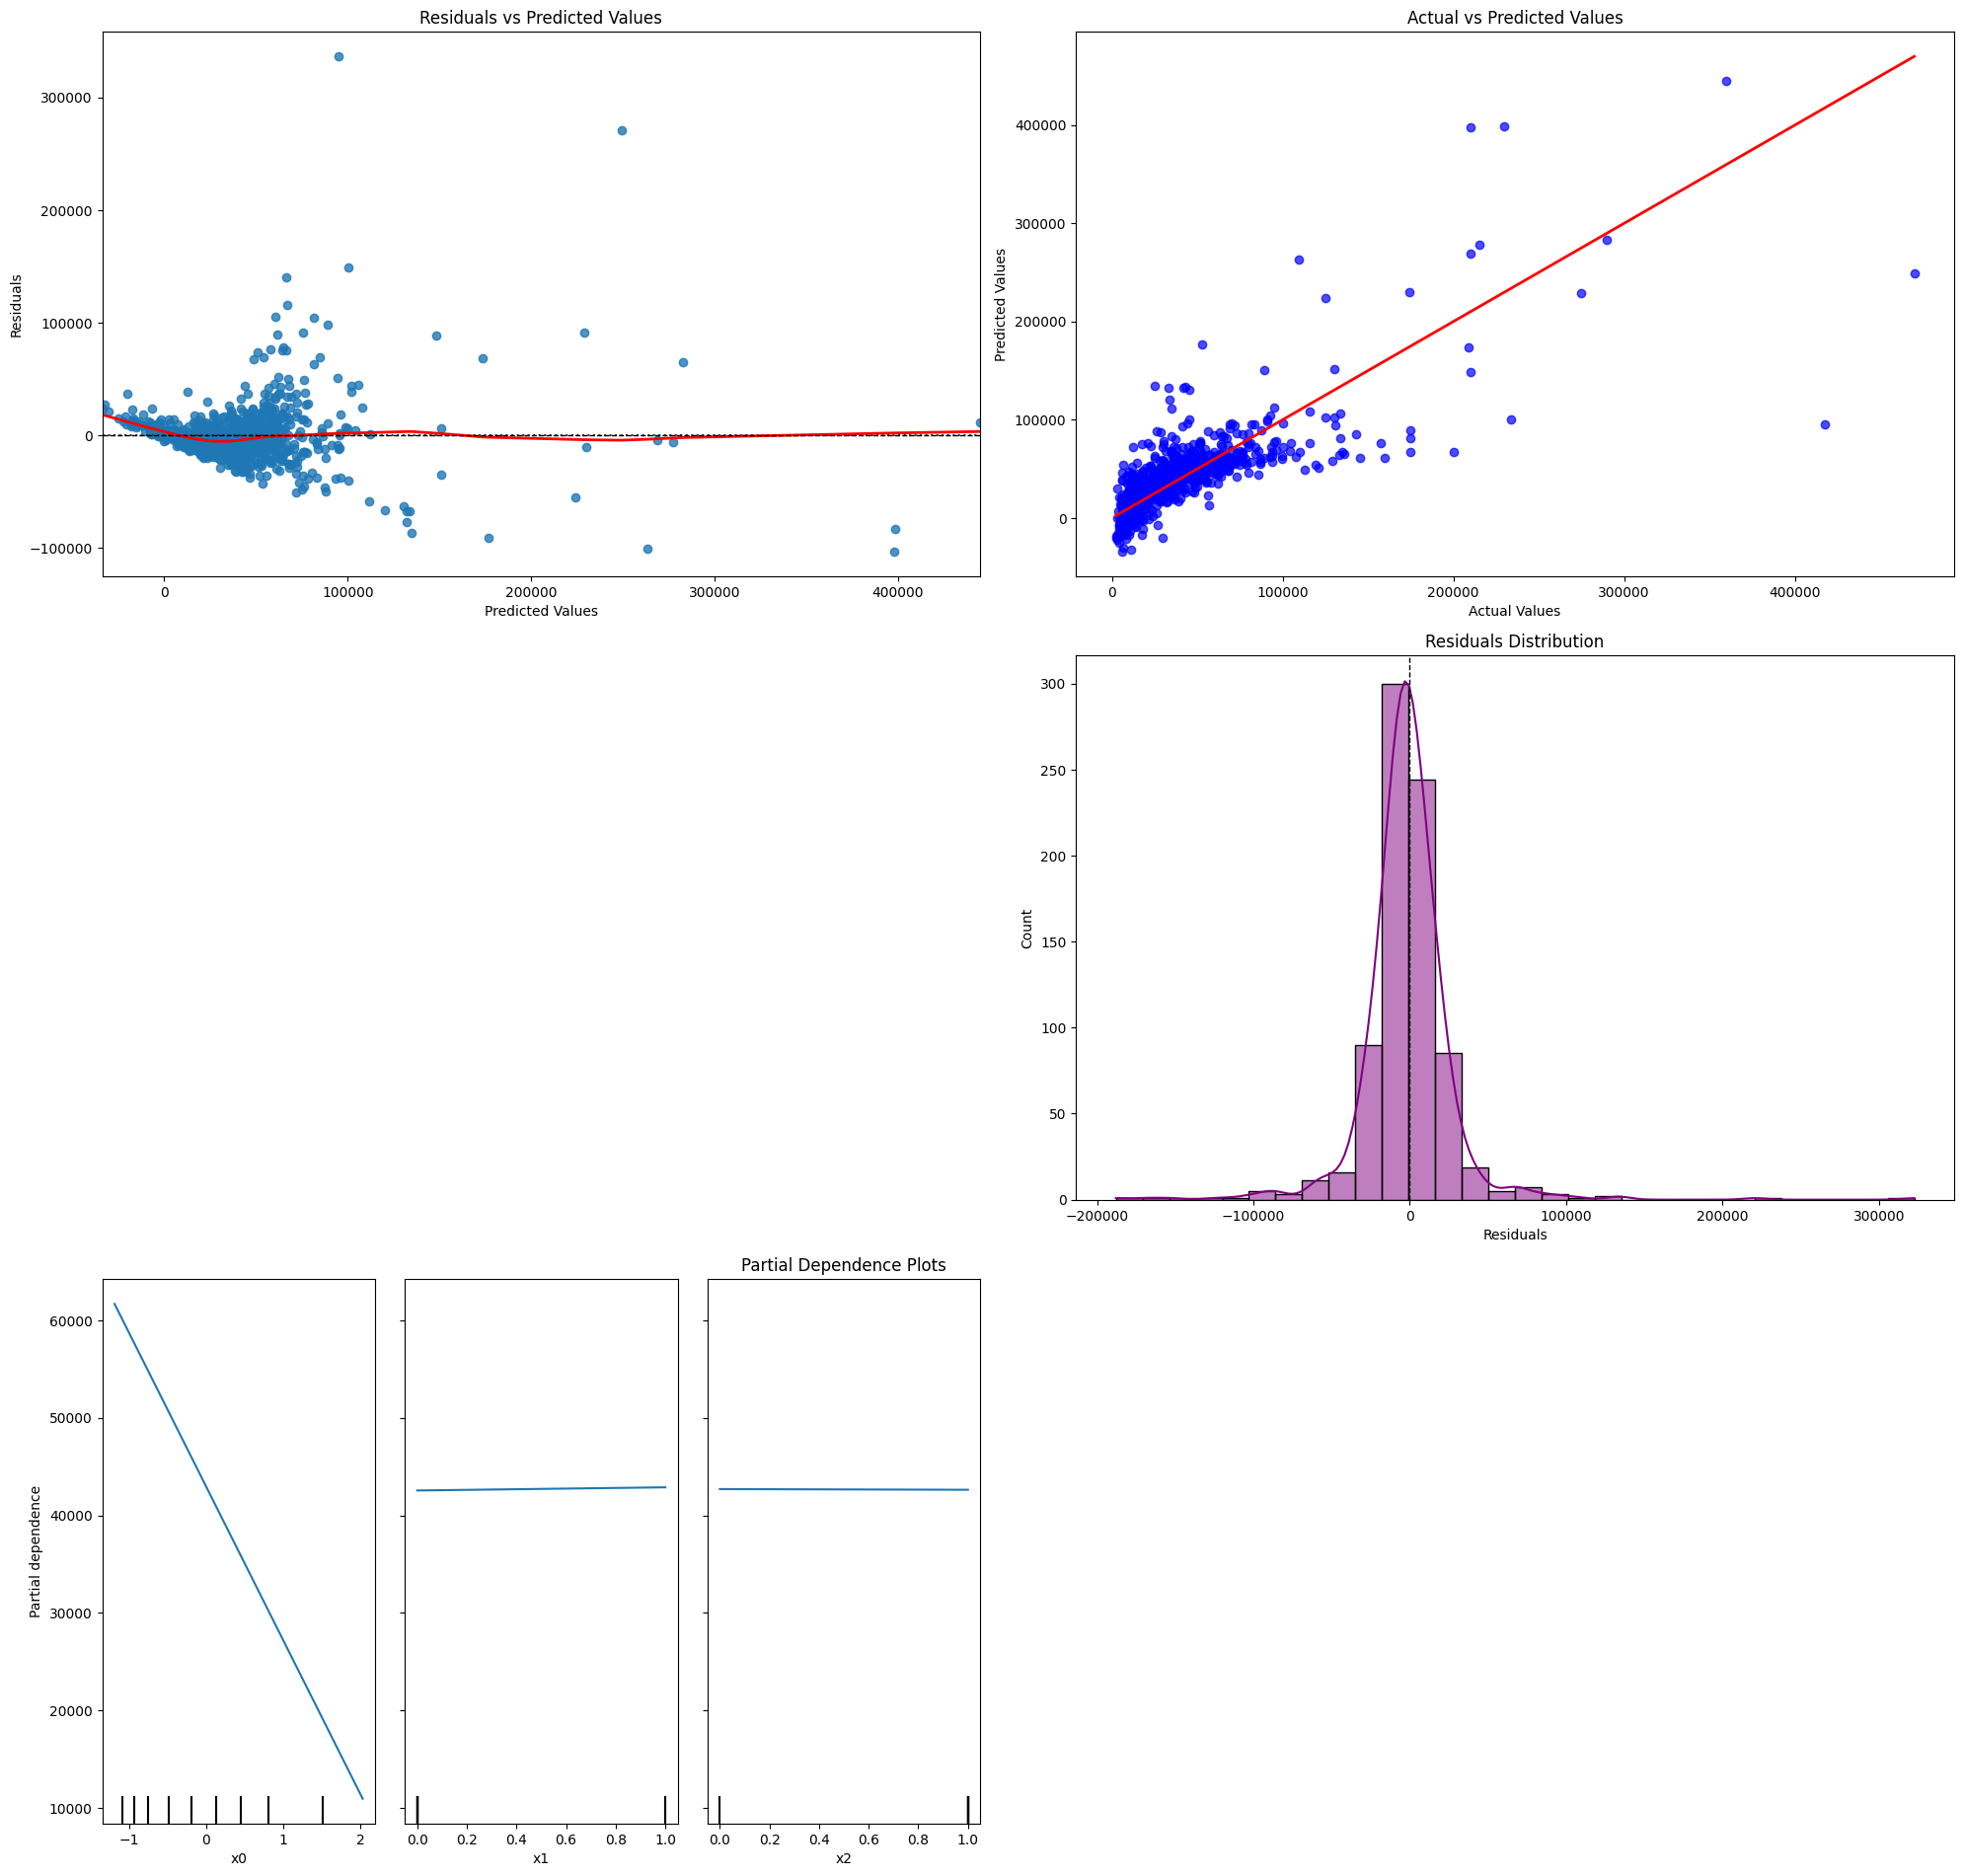

Best Result for RidgeCV:
  Number of Selected Features: 6
  Selected Features: ['milage', 'encoded_brand', 'transmission_A/T', 'engine_displacement', 'ext_col_encoded', 'int_col_encoded']
  Mean Squared Error: 878639941.3446958
  R2 Score: 0.5180603625174691


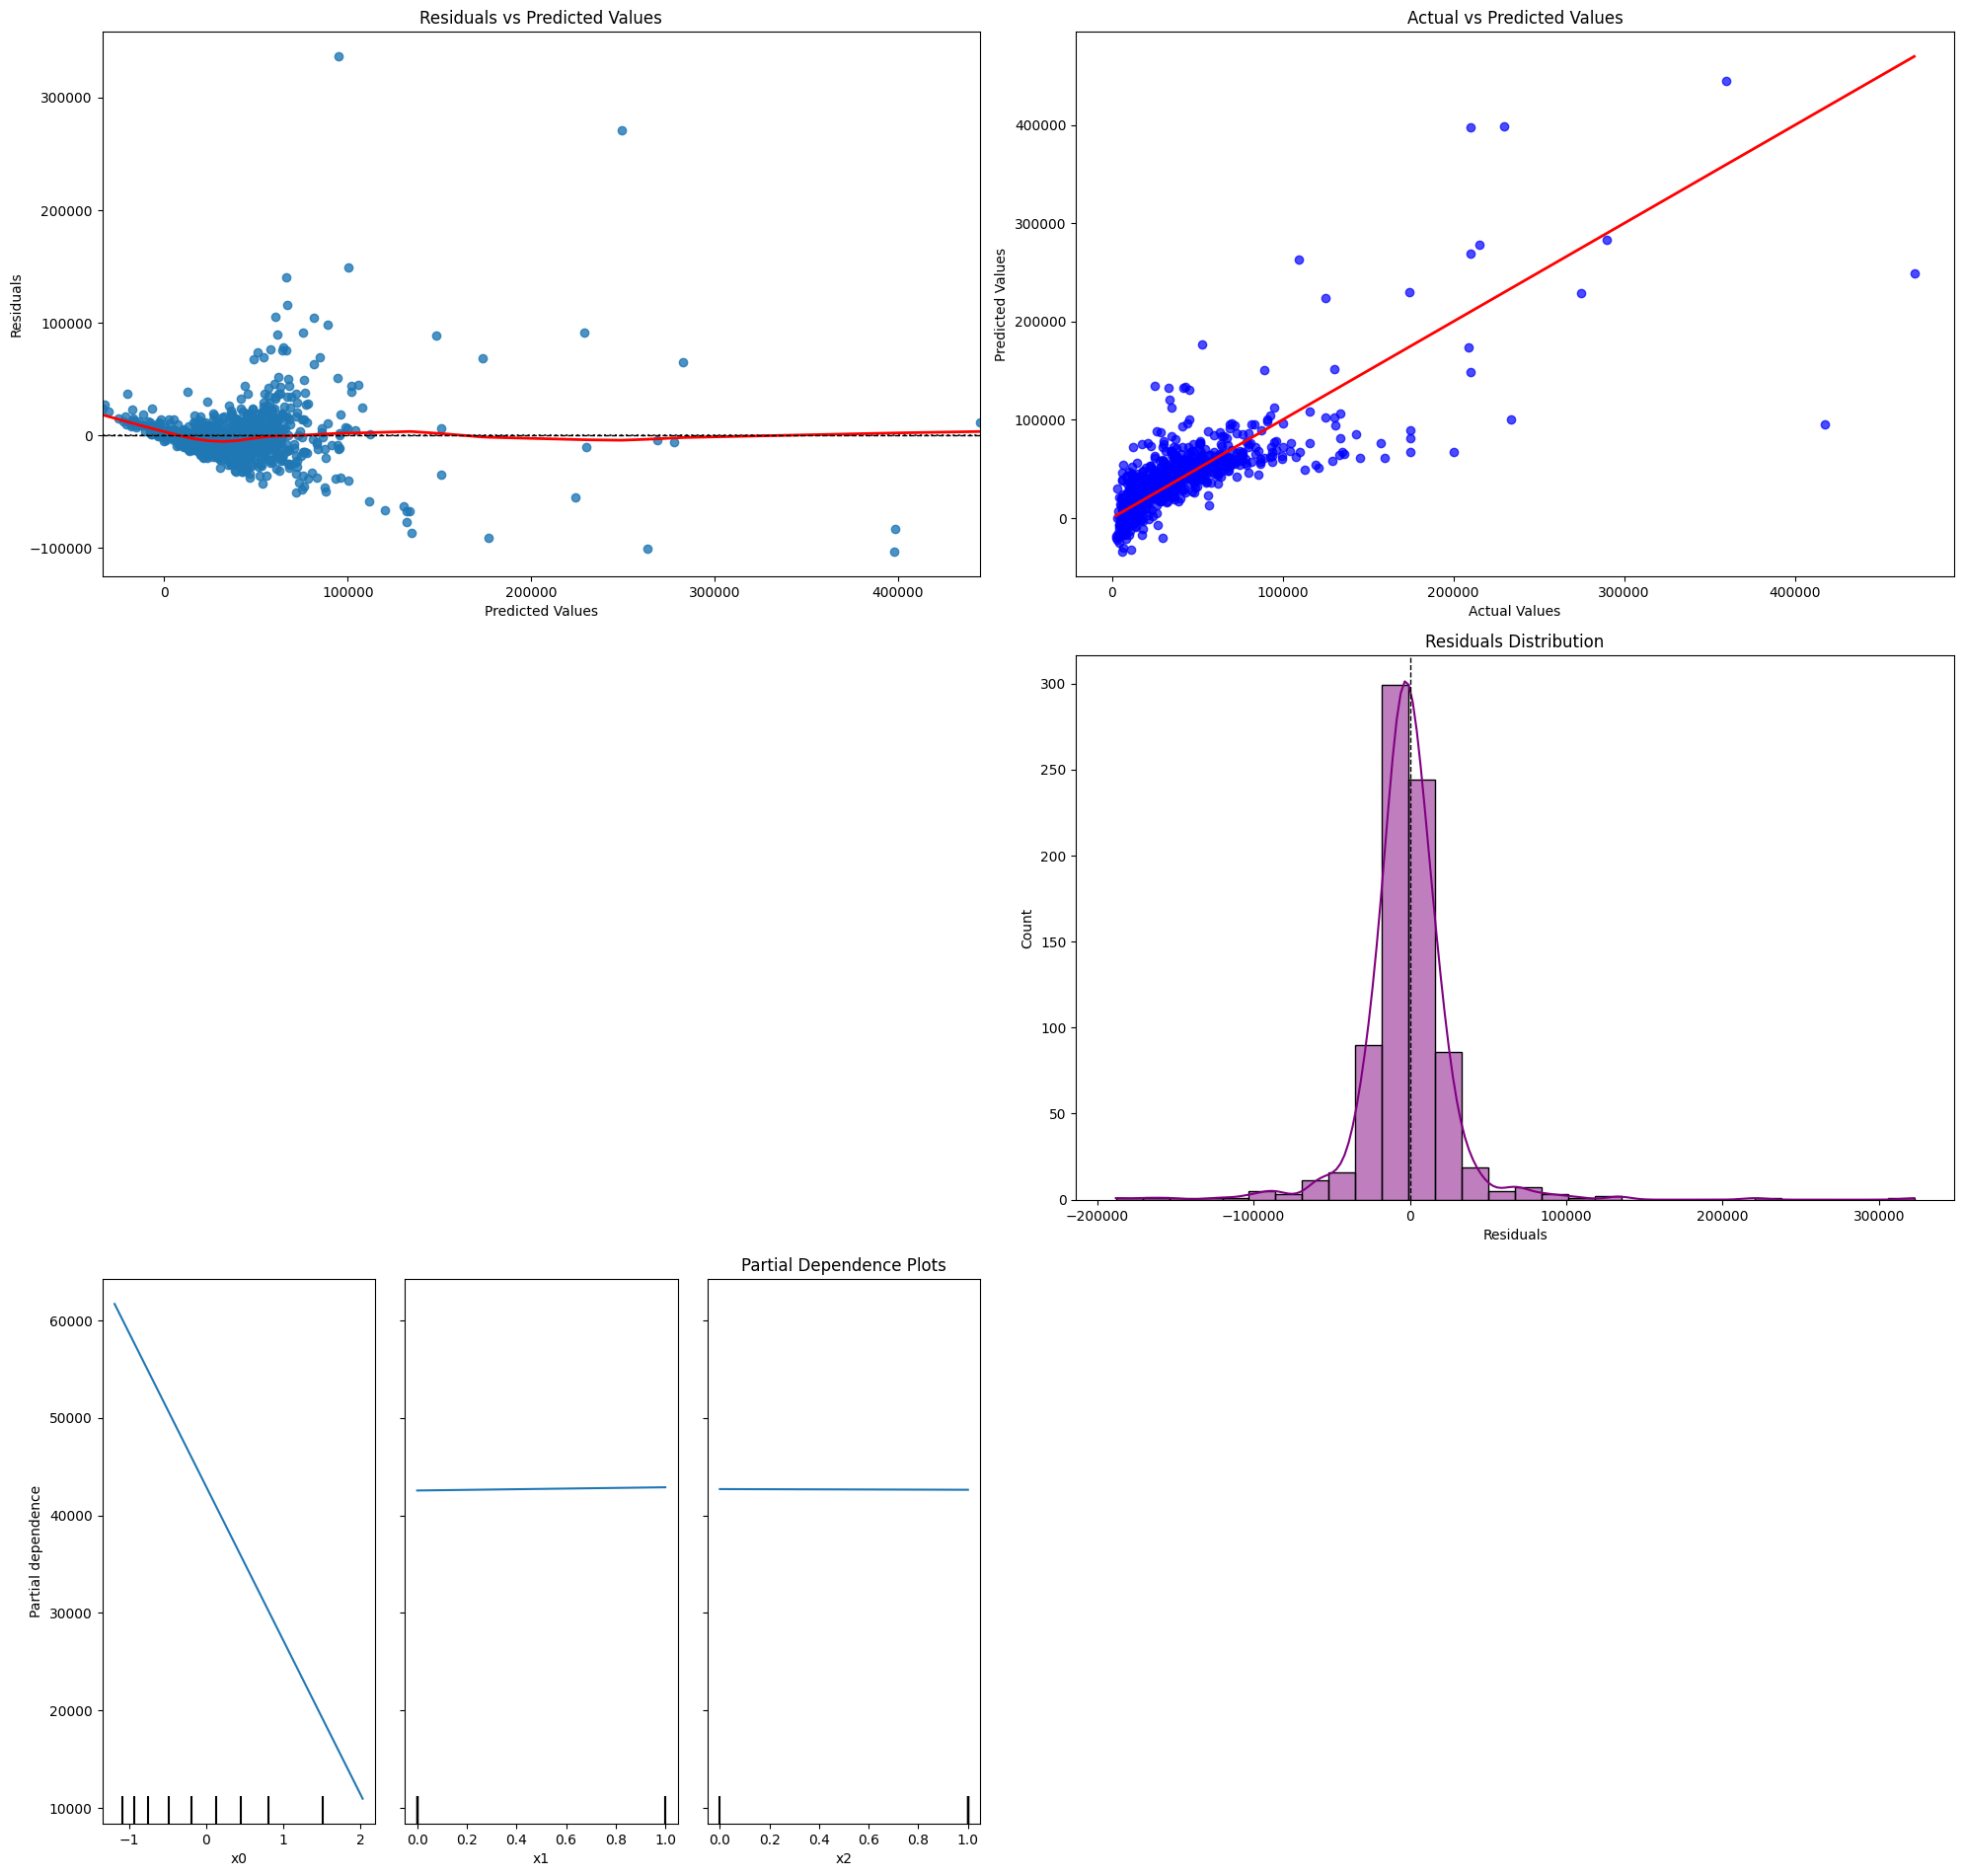

Best Result for LinearRegression:
  Number of Selected Features: 6
  Selected Features: ['milage', 'encoded_brand', 'transmission_A/T', 'engine_displacement', 'ext_col_encoded', 'int_col_encoded']
  Mean Squared Error: 878654974.1379756
  R2 Score: 0.5180521169340366


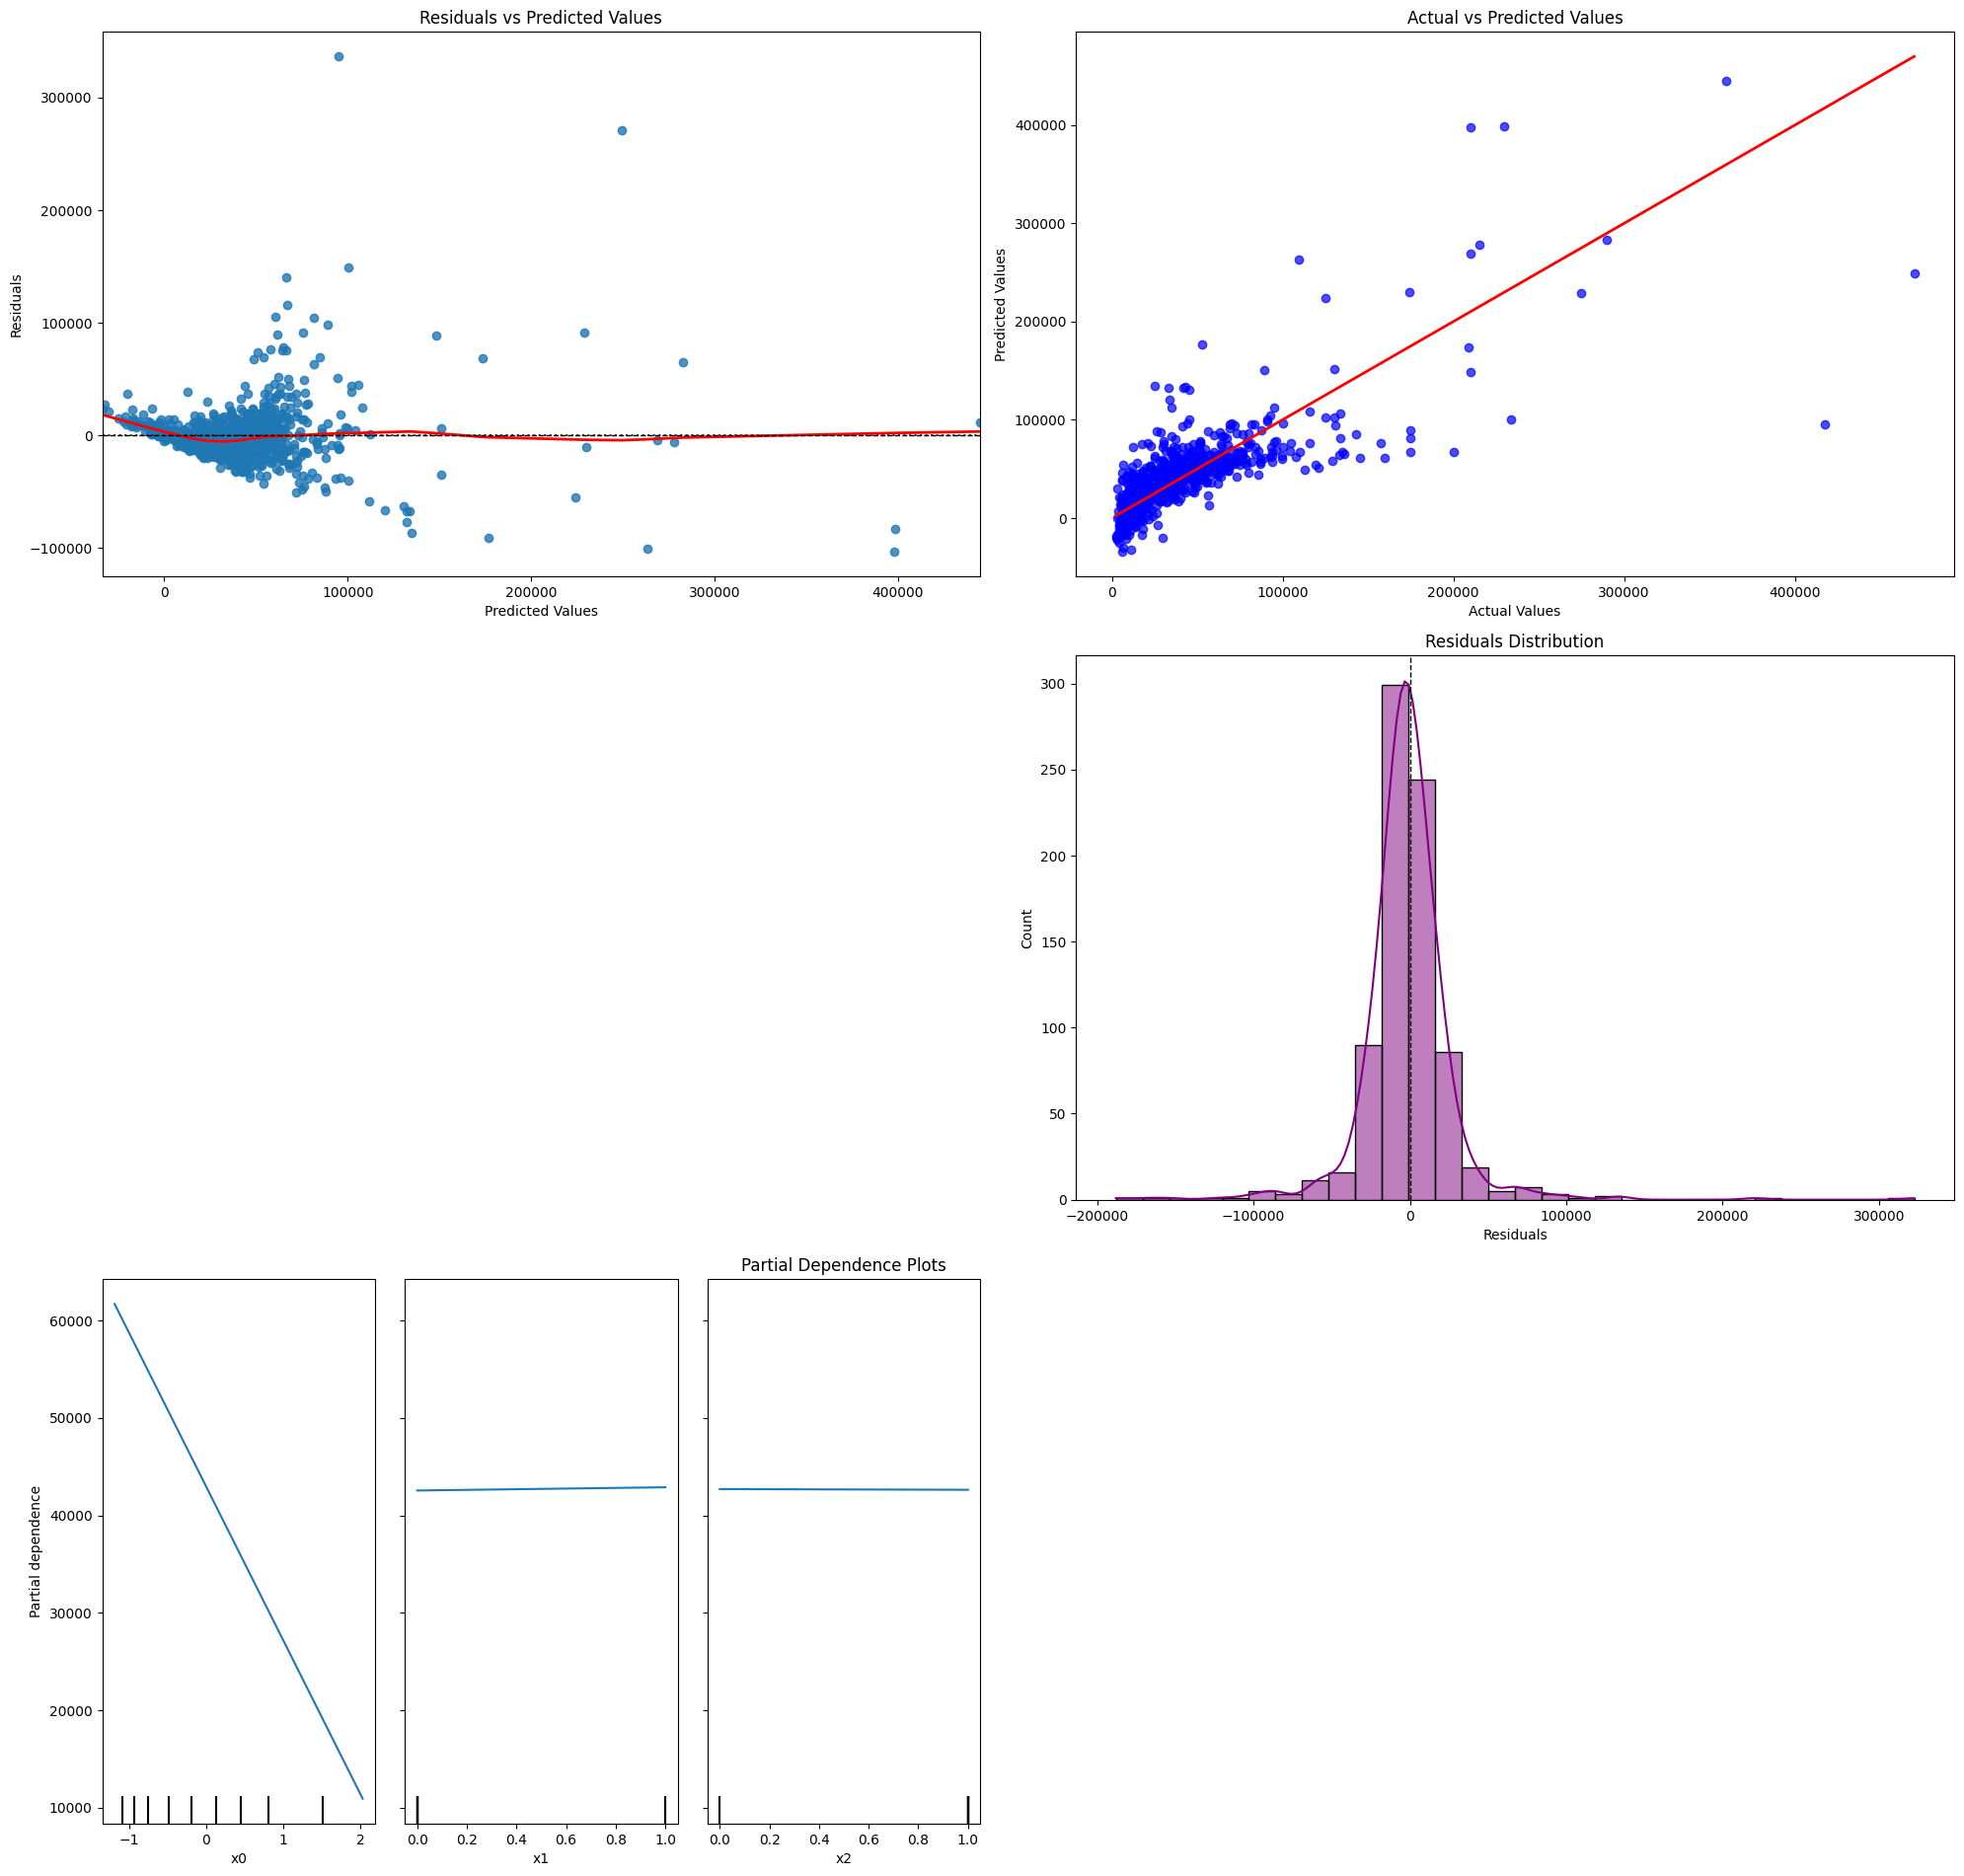

Best Result for RandomForestRegressor:
  Number of Selected Features: 6
  Selected Features: ['milage', 'encoded_brand', 'model_id', 'engine_displacement', 'ext_col_encoded', 'int_col_encoded']
  Mean Squared Error: 335863729.1024245
  R2 Score: 0.8157765926285698
Visualization skipped for RandomForestRegressor due to: Length of values (15) does not match length of index (6)
Best Result for XGBRegressor:
  Number of Selected Features: 2
  Selected Features: ['accident', 'encoded_brand']
  Mean Squared Error: 1036914082.5827103
  R2 Score: 0.43124598194837205
Visualization skipped for XGBRegressor due to: Length of values (15) does not match length of index (2)
Best Result for LassoCV:
  Number of Selected Features: 12
  Selected Features: ['milage', 'encoded_brand', 'model_id', 'fuel_type_id', 'transmission_A/T', 'transmission_CVT', 'transmission_M/T', 'transmission_Transmission w/Dual Shift Mode', 'engine_displacement', 'ext_col_encoded', 'int_col_encoded', 'color_changed']
  Mean Squ

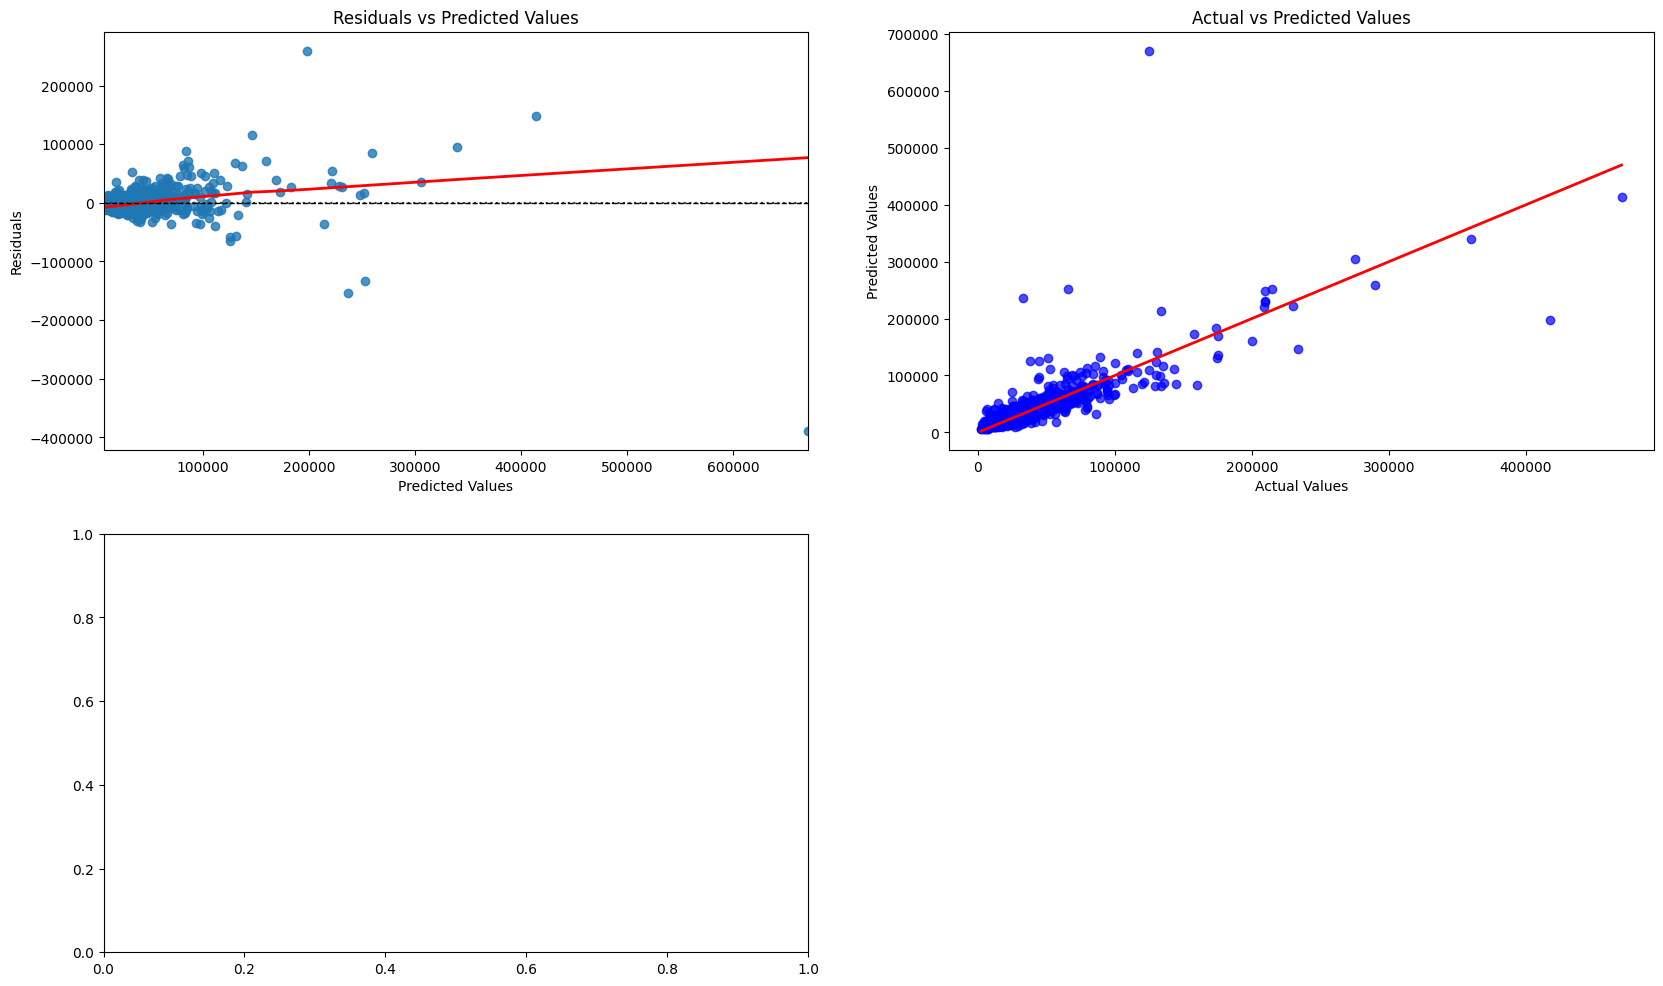

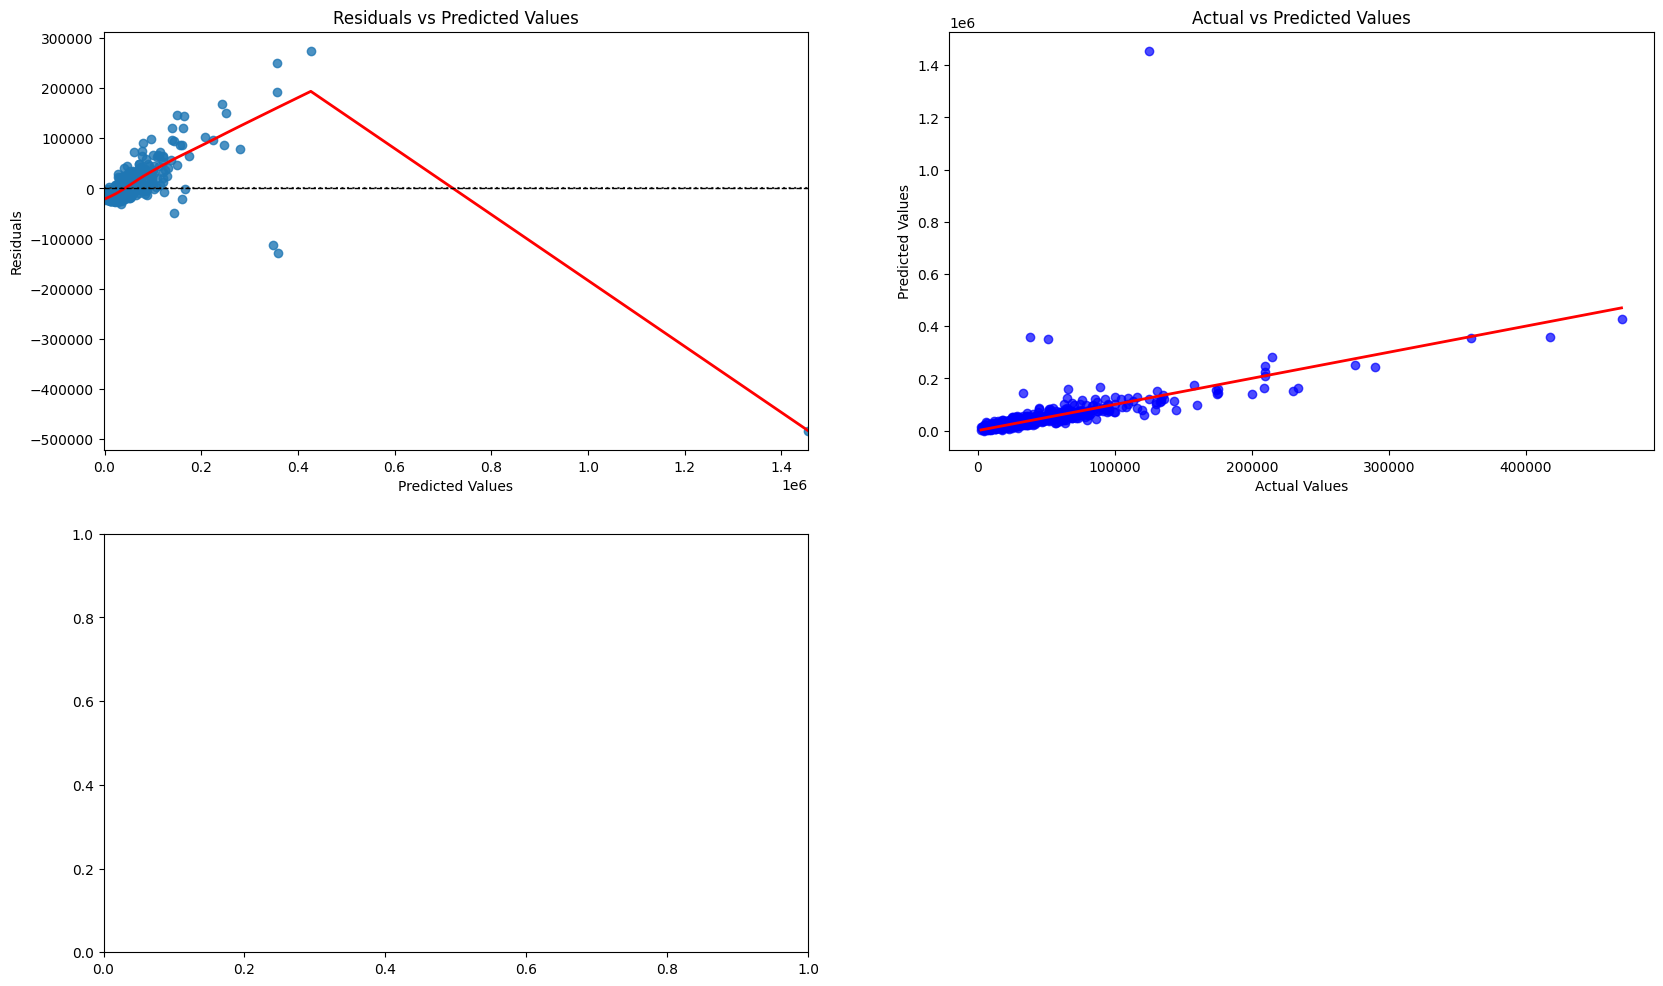

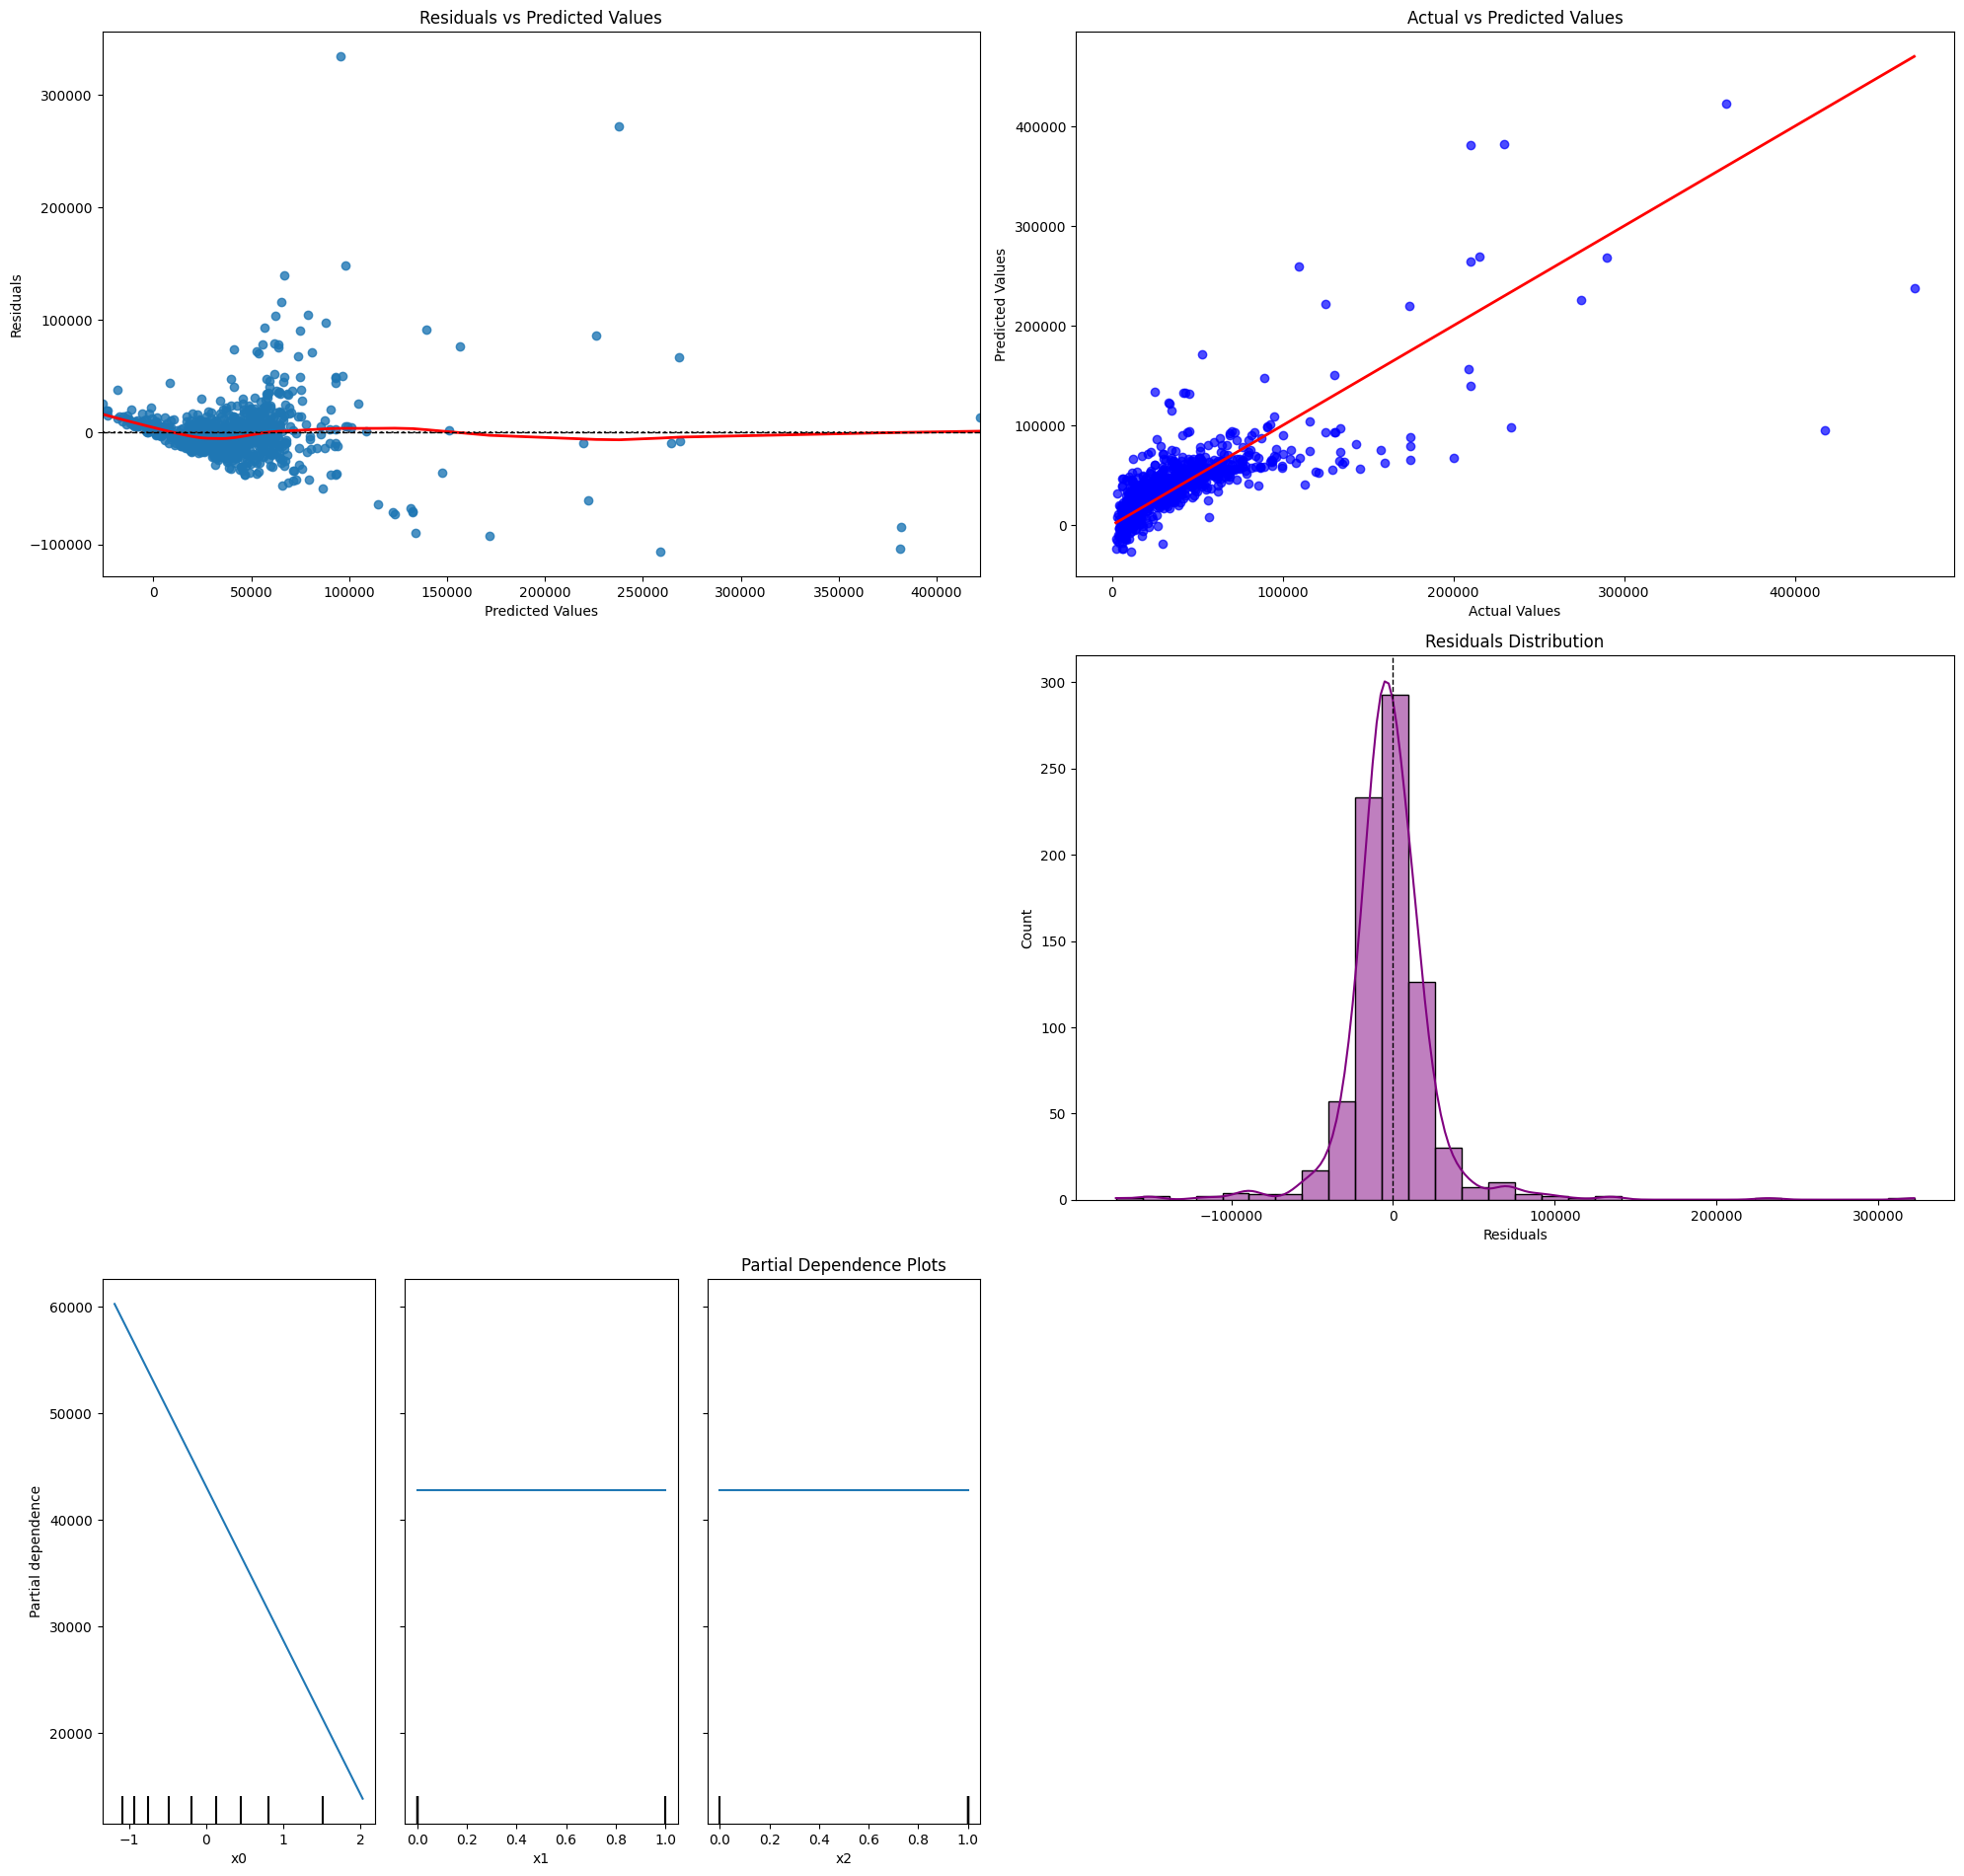

In [ ]:
from sklearn.feature_selection import RFE
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, RidgeCV, LinearRegression, LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Split your data
X = df.drop(
    columns=['price', 'brand', 'model', 'model_year', 'fuel_type', 'engine', 'transmission',
             'ext_col', 'int_col']
)
y = df['price']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
models = [Ridge(), RidgeCV(), LinearRegression(), RandomForestRegressor(), XGBRegressor(), LassoCV()]

# Iterate through each model
for model in models:
    best_r2 = float('-inf')  # Initialize the best R² for this model
    best_features = None
    best_mse = None
    best_n_features = None

    for i in range(1, len(X.columns) + 1):  # Iterate over the number of features to select
        rfe = RFE(estimator=model, n_features_to_select=i)
        X_train_rfe = rfe.fit_transform(X_train, y_train)

        # Train the model on selected features
        model.fit(X_train_rfe, y_train)

        # Evaluate the model
        X_test_rfe = rfe.transform(X_test)
        y_pred = model.predict(X_test_rfe)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        selected_features = X_train.columns[rfe.support_]

        # Update the best results for this model
        if r2 > best_r2:
            best_r2 = r2
            best_features = selected_features.tolist()
            best_mse = mse
            best_n_features = i

    # Create a DataFrame from X_test_rfe for visualization
    X_test_rfe_df = pd.DataFrame(X_test_rfe, columns=selected_features)  # Convert back to DataFrame

    # Add actual and predicted prices
    X_test_rfe_df['actual_price'] = y_test.values  # Use y_test instead of y_train
    X_test_rfe_df['predicted_price'] = y_pred  # Add the predicted prices

    # Print the best result for this model
    print(f"Best Result for {model.__class__.__name__}:")
    print(f"  Number of Selected Features: {best_n_features}")
    print(f"  Selected Features: {best_features}")
    print(f"  Mean Squared Error: {best_mse}")
    print(f"  R2 Score: {best_r2}")

    # Calculate residuals
    residuals = y_test - y_pred
    prediction_errors = residuals

    # Set up the figure
    plt.figure(figsize=(20, 25))

    # 1. Residual Plot
    plt.subplot(4, 2, 1)
    sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 2})
    plt.axhline(0, color='black', linestyle='--', linewidth=1)
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residuals vs Predicted Values')

    # 2. Actual vs Predicted Plot
    plt.subplot(4, 2, 2)
    plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs Predicted Values')

    # 3. Feature Importance (for tree-based models)
    if hasattr(model, "feature_importances_"):
        try:
            feature_importance = pd.Series(model.feature_importances_, index=selected_features)
            feature_importance.sort_values(ascending=False, inplace=True)

            plt.subplot(4, 2, 3)
            sns.barplot(x=feature_importance, y=feature_importance.index, palette='viridis')
            plt.title(f'Feature Importance for {model.__class__.__name__}')
            plt.xlabel('Importance Score')
            plt.ylabel('Features')
        except ValueError as e:
            print(f"Visualization skipped for {model.__class__.__name__} due to: {e}")

    # 4. Error Distribution Plot
    plt.subplot(4, 2, 4)
    sns.histplot(residuals, kde=True, bins=30, color='purple')
    plt.axvline(0, color='black', linestyle='--', linewidth=1)
    plt.xlabel('Residuals')
    plt.title('Residuals Distribution')

    # 5. Prediction Error Distribution
    plt.subplot(4, 2, 5)
    sns.kdeplot(prediction_errors, fill=True, color='orange')
    plt.axvline(0, color='black', linestyle='--', linewidth=1)
    plt.xlabel('Prediction Error')
    plt.title('Prediction Error Distribution')

    # 6. Partial Dependence Plots (PDPs) (for interpretable models)
    if hasattr(model, "predict"):
        try:
            plt.subplot(4, 2, 6)
            features_to_plot = list(range(min(3, X_test.shape[1])))  # Plot first 3 features
            PartialDependenceDisplay.from_estimator(model, X_test, features_to_plot, ax=plt.gca())
            plt.title('Partial Dependence Plots')
        except Exception as e:
            print(f"Partial Dependence Plot skipped for {model.__class__.__name__} due to: {e}")

    # 7. Learning Curve
    plt.subplot(4, 2, 7)
    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='r2')
    train_mean = train_scores.mean(axis=1)
    test_mean = test_scores.mean(axis=1)
    plt.plot(train_sizes, train_mean, label='Training Score', color='blue')
    plt.plot(train_sizes, test_mean, label='Validation Score', color='red')
    plt.xlabel('Training Set Size')
    plt.ylabel('R² Score')
    plt.title('Learning Curve')
    plt.legend()

    # Adjust layout
    plt.tight_layout()
    plt.show()
    print("=" * 60)


In [ ]:
from scipy.stats import zscore

# Calculate Z-scores for the 'price' column
df['z_score'] = zscore(df['price'])

# Filter out data points with Z-scores beyond the threshold
threshold = 3
df_cleaned = df[df['z_score'].abs() <= threshold]

# Drop the Z-score column after filtering
df_cleaned.drop(columns=['z_score'], inplace=True)

print(f"Original dataset size: {df.shape[0]}")
print(f"Dataset size after removing outliers: {df_cleaned.shape[0]}")

Original dataset size: 3988
Dataset size after removing outliers: 3953


Best Result for Ridge:
  Number of Selected Features: 8
  Selected Features: ['milage', 'accident', 'encoded_brand', 'transmission_M/T', 'transmission_Transmission w/Dual Shift Mode', 'engine_displacement', 'ext_col_encoded', 'int_col_encoded']
  Mean Squared Error: 511764521.959076
  R2 Score: 0.6213685751927257


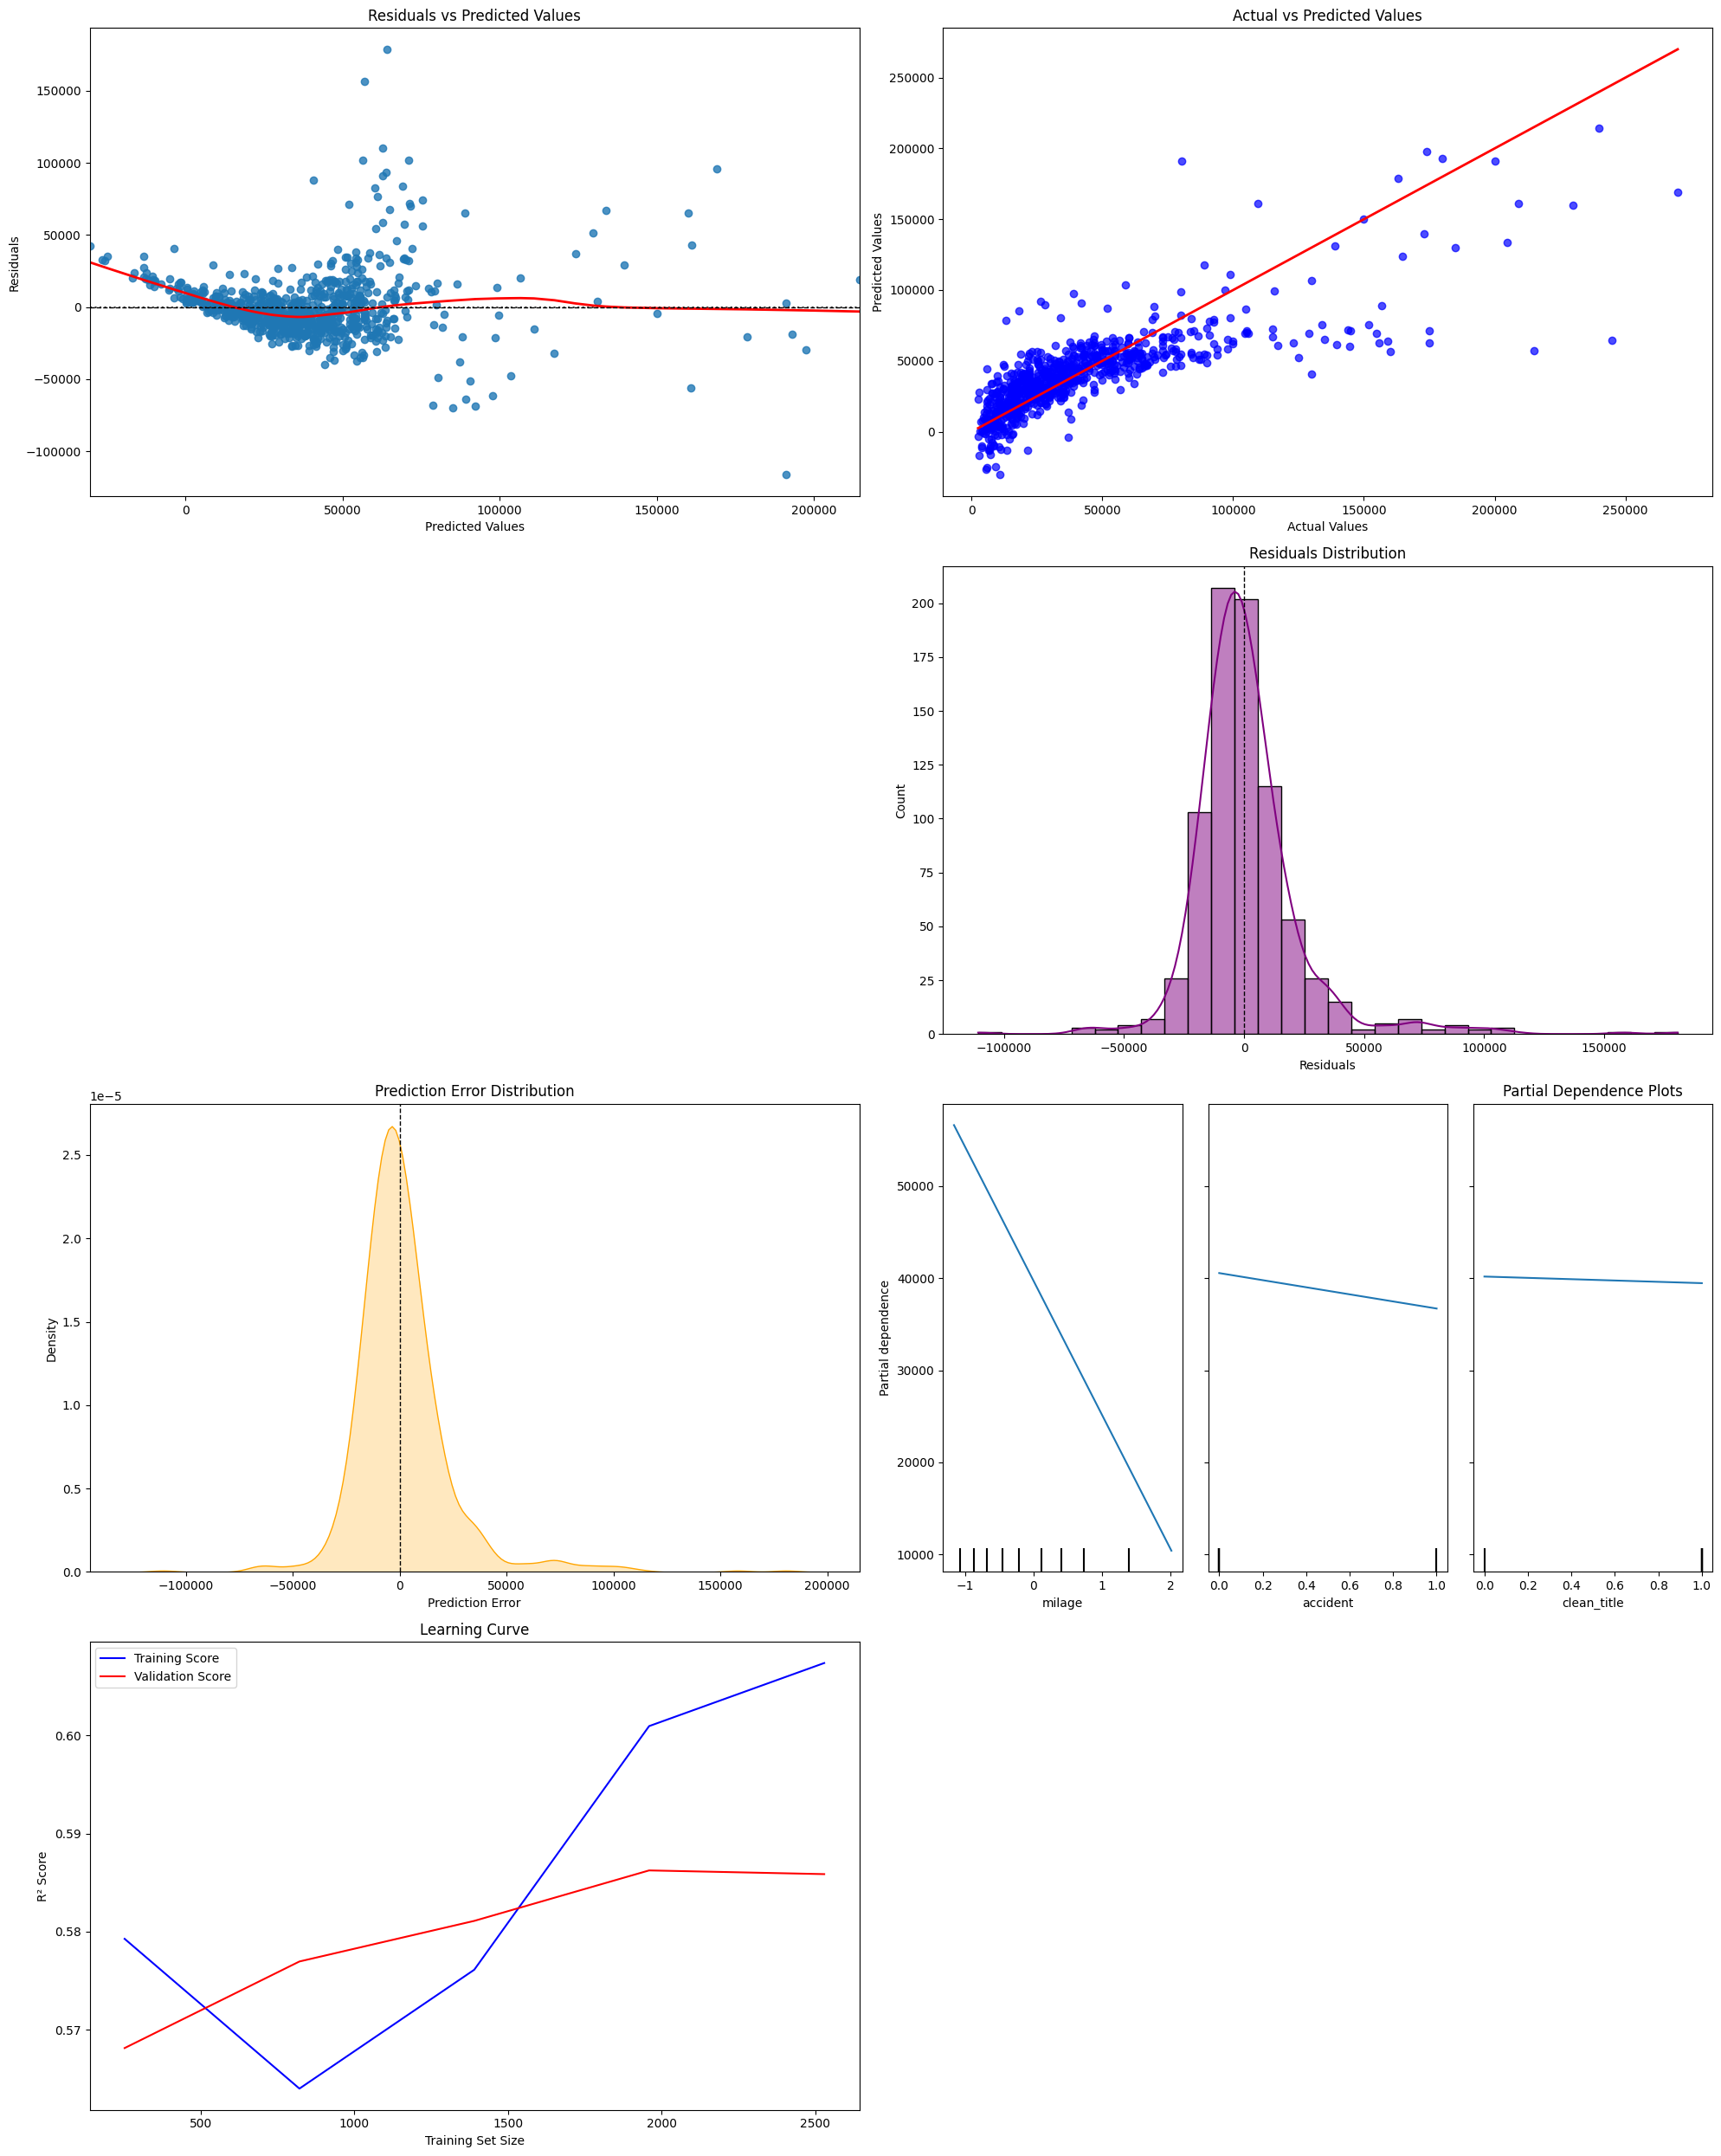

Best Result for RidgeCV:
  Number of Selected Features: 8
  Selected Features: ['milage', 'accident', 'encoded_brand', 'transmission_M/T', 'transmission_Transmission w/Dual Shift Mode', 'engine_displacement', 'ext_col_encoded', 'int_col_encoded']
  Mean Squared Error: 511598290.46433365
  R2 Score: 0.6214915623577234


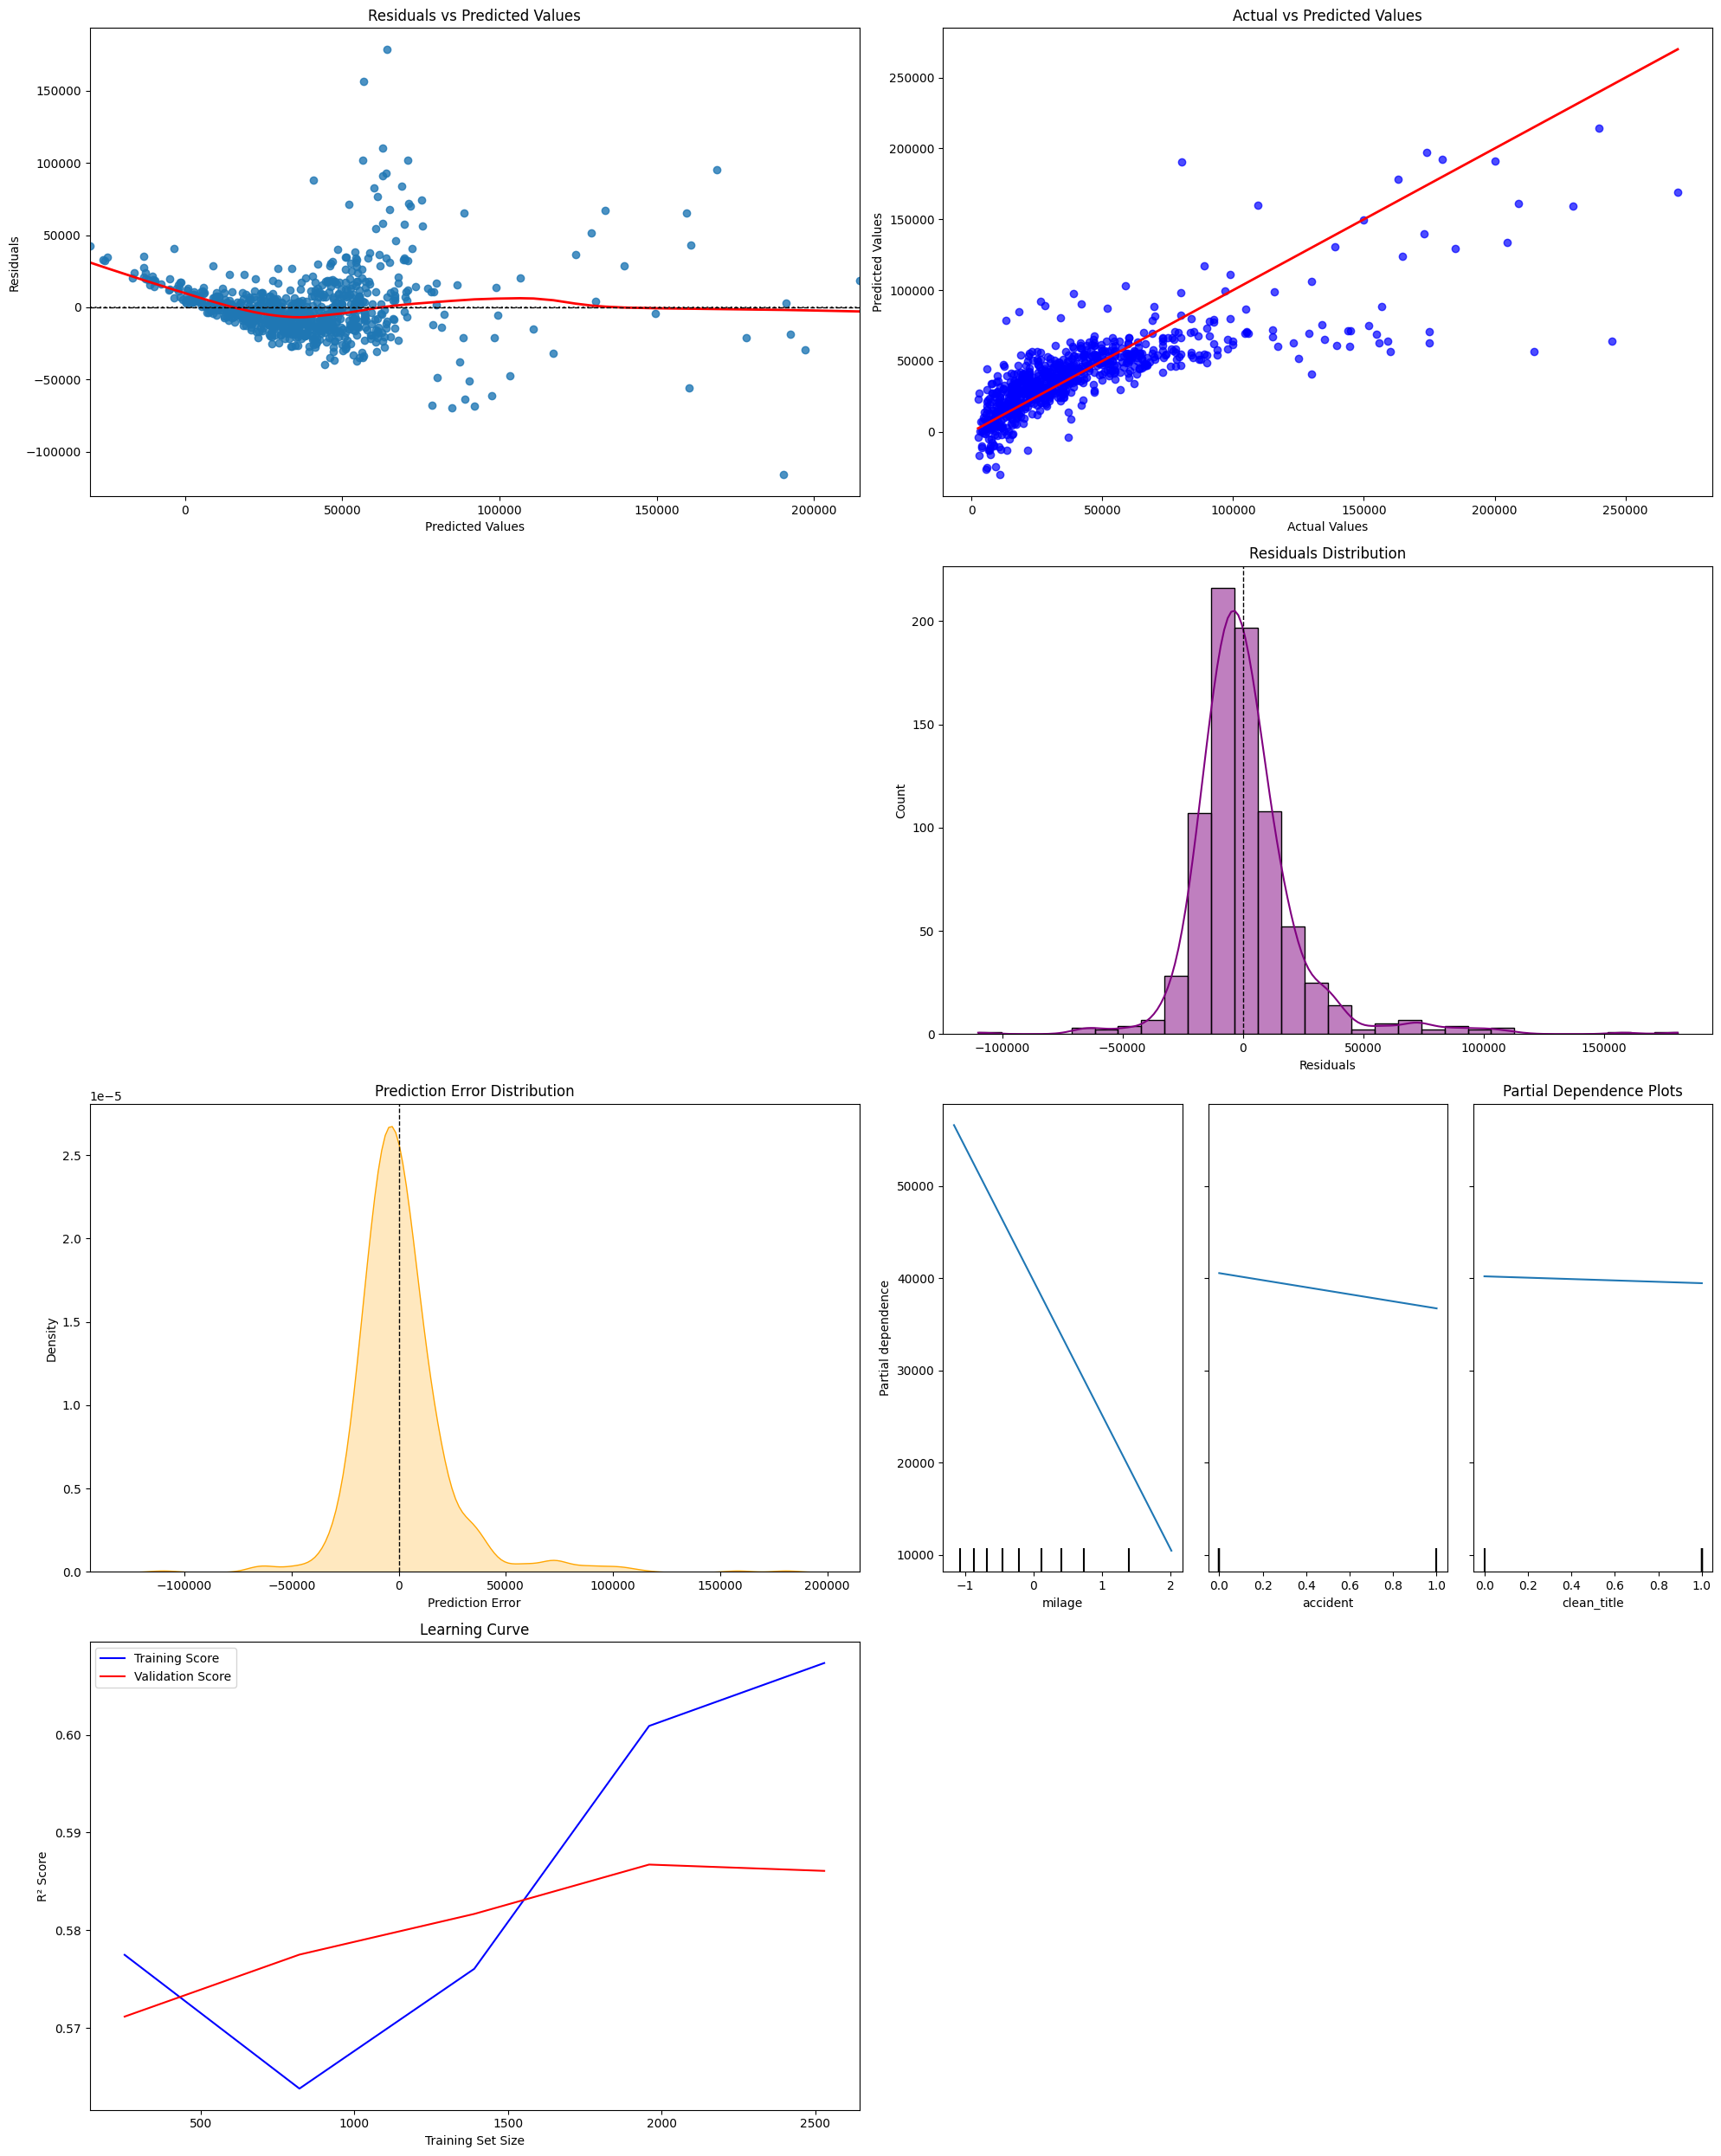

Best Result for LinearRegression:
  Number of Selected Features: 8
  Selected Features: ['milage', 'accident', 'encoded_brand', 'transmission_M/T', 'transmission_Transmission w/Dual Shift Mode', 'engine_displacement', 'ext_col_encoded', 'int_col_encoded']
  Mean Squared Error: 511784636.2424409
  R2 Score: 0.6213536935441497


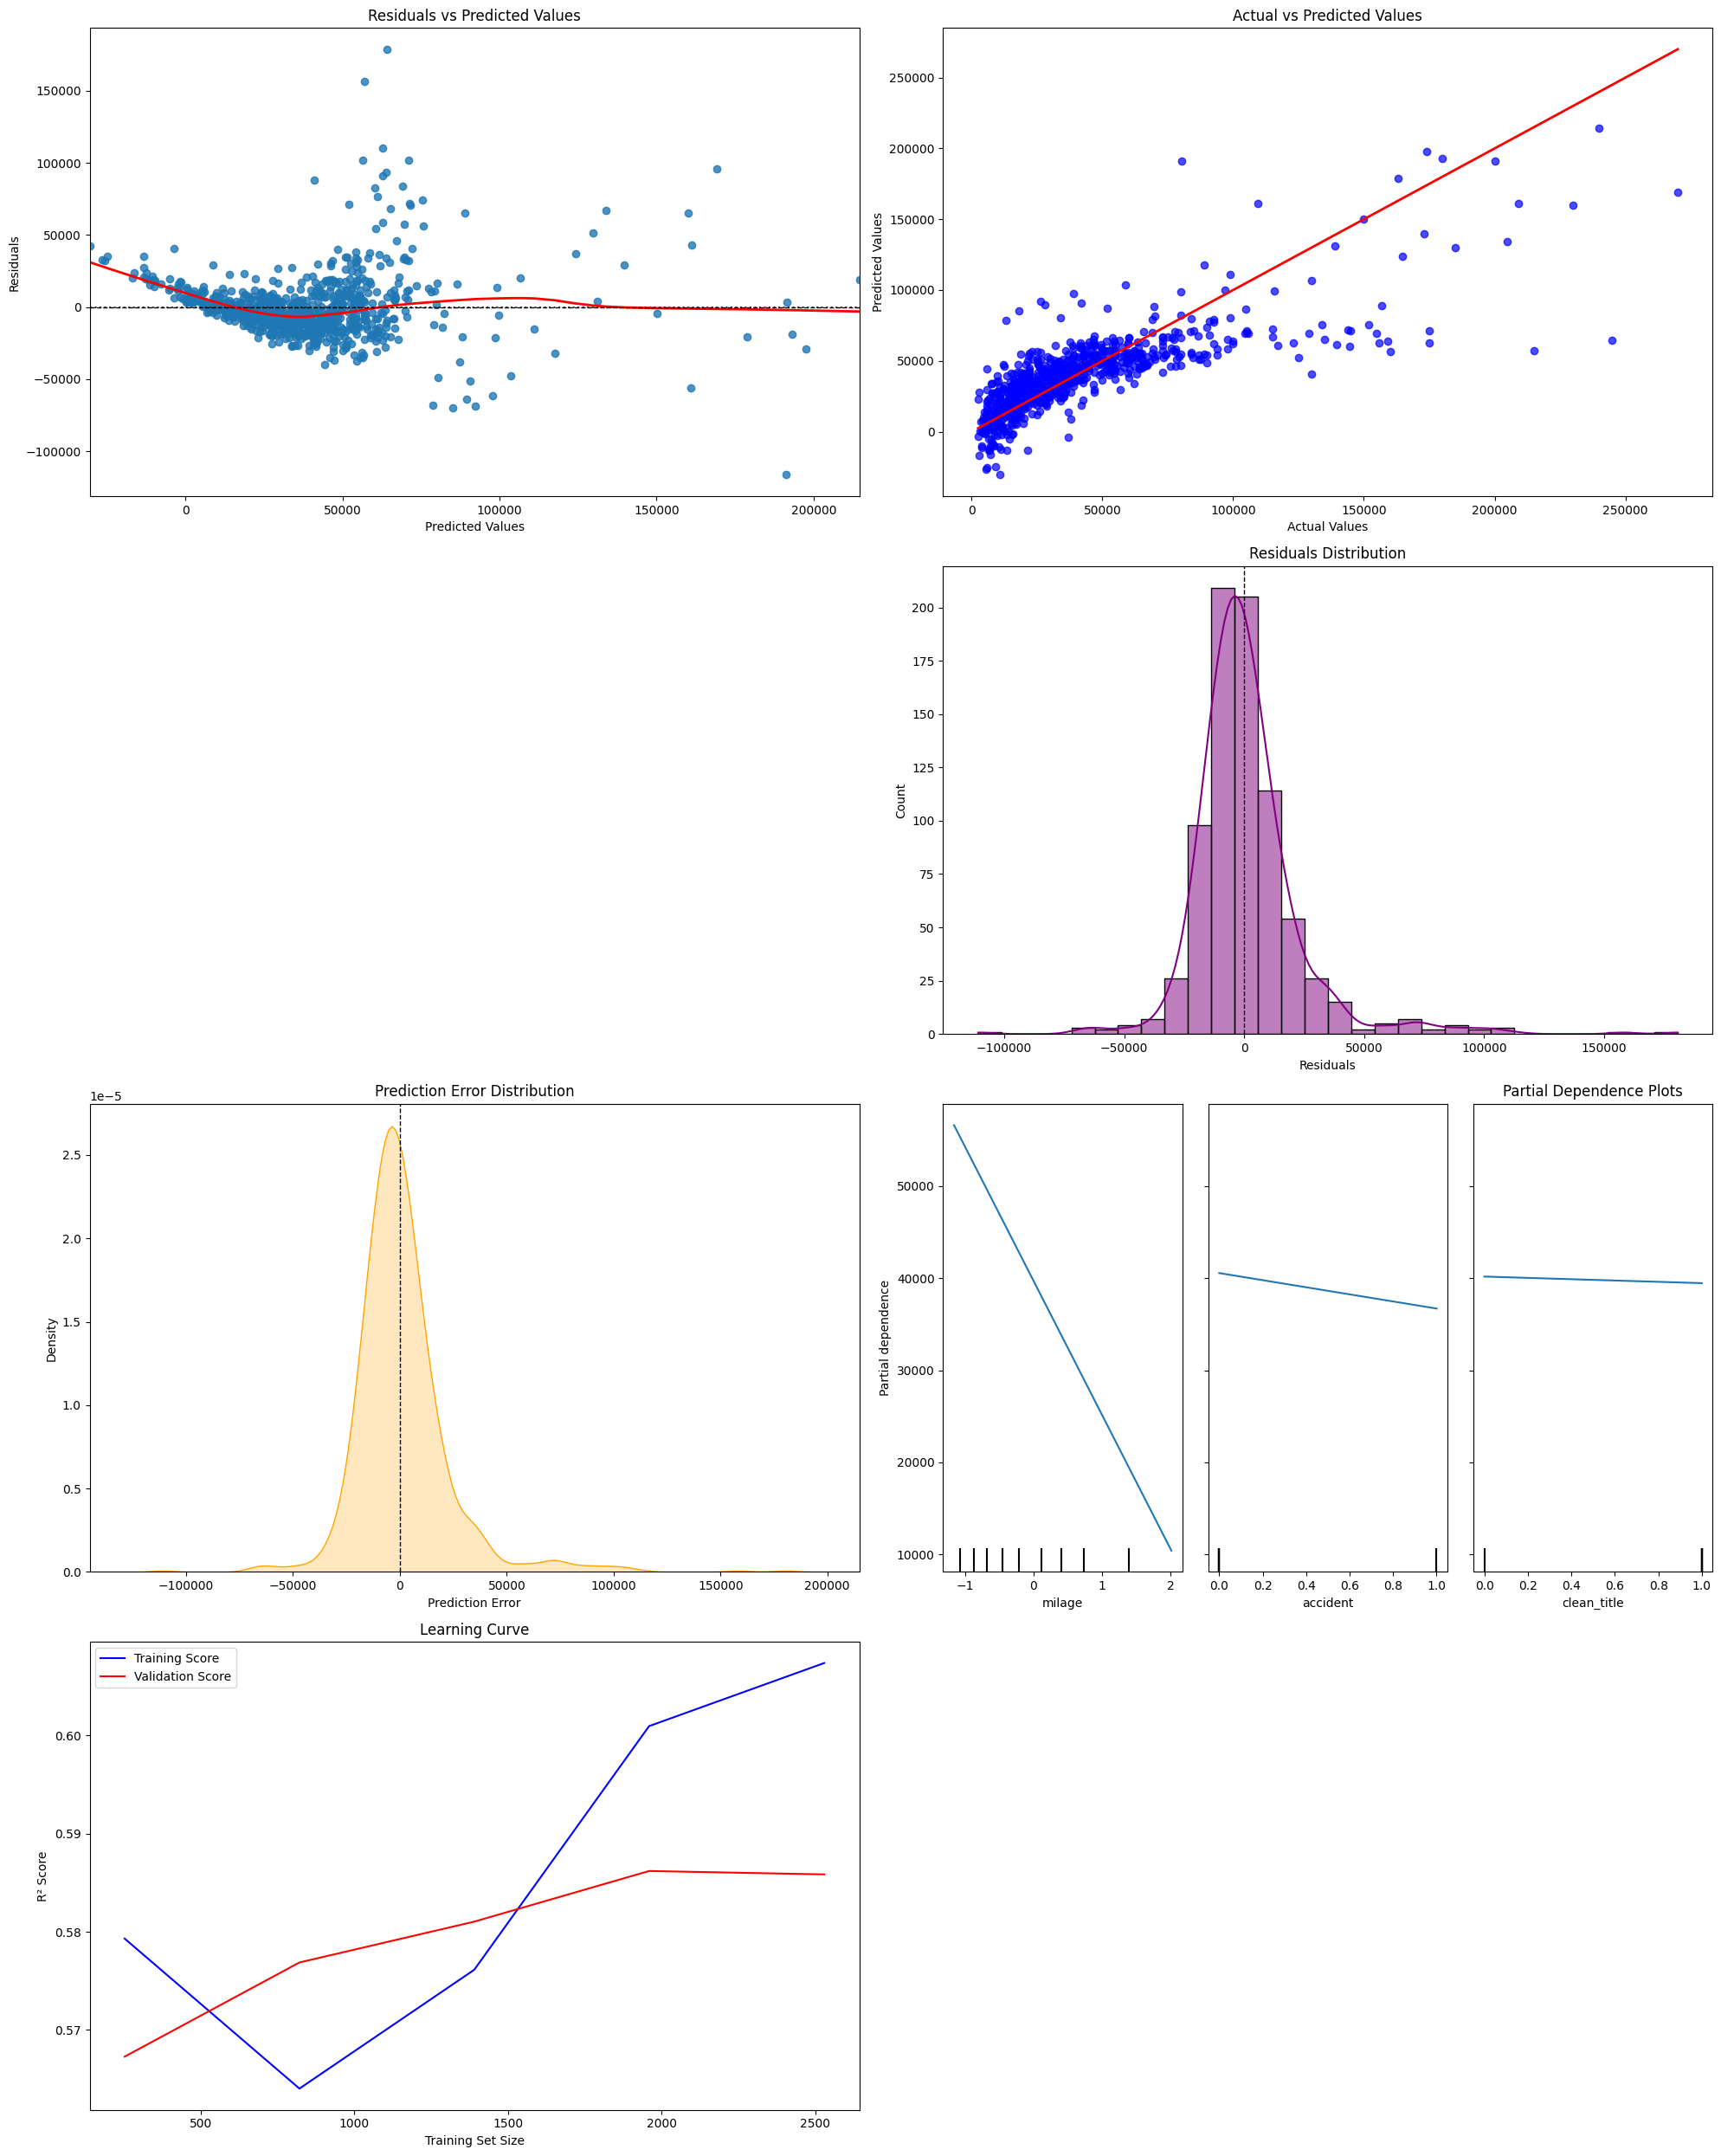

Best Result for RandomForestRegressor:
  Number of Selected Features: 14
  Selected Features: ['milage', 'accident', 'clean_title', 'encoded_brand', 'brand_id', 'model_id', 'fuel_type_id', 'transmission_A/T', 'transmission_M/T', 'transmission_Transmission w/Dual Shift Mode', 'engine_displacement', 'ext_col_encoded', 'int_col_encoded', 'color_changed']
  Mean Squared Error: 203842098.1396546
  R2 Score: 0.849186450520512


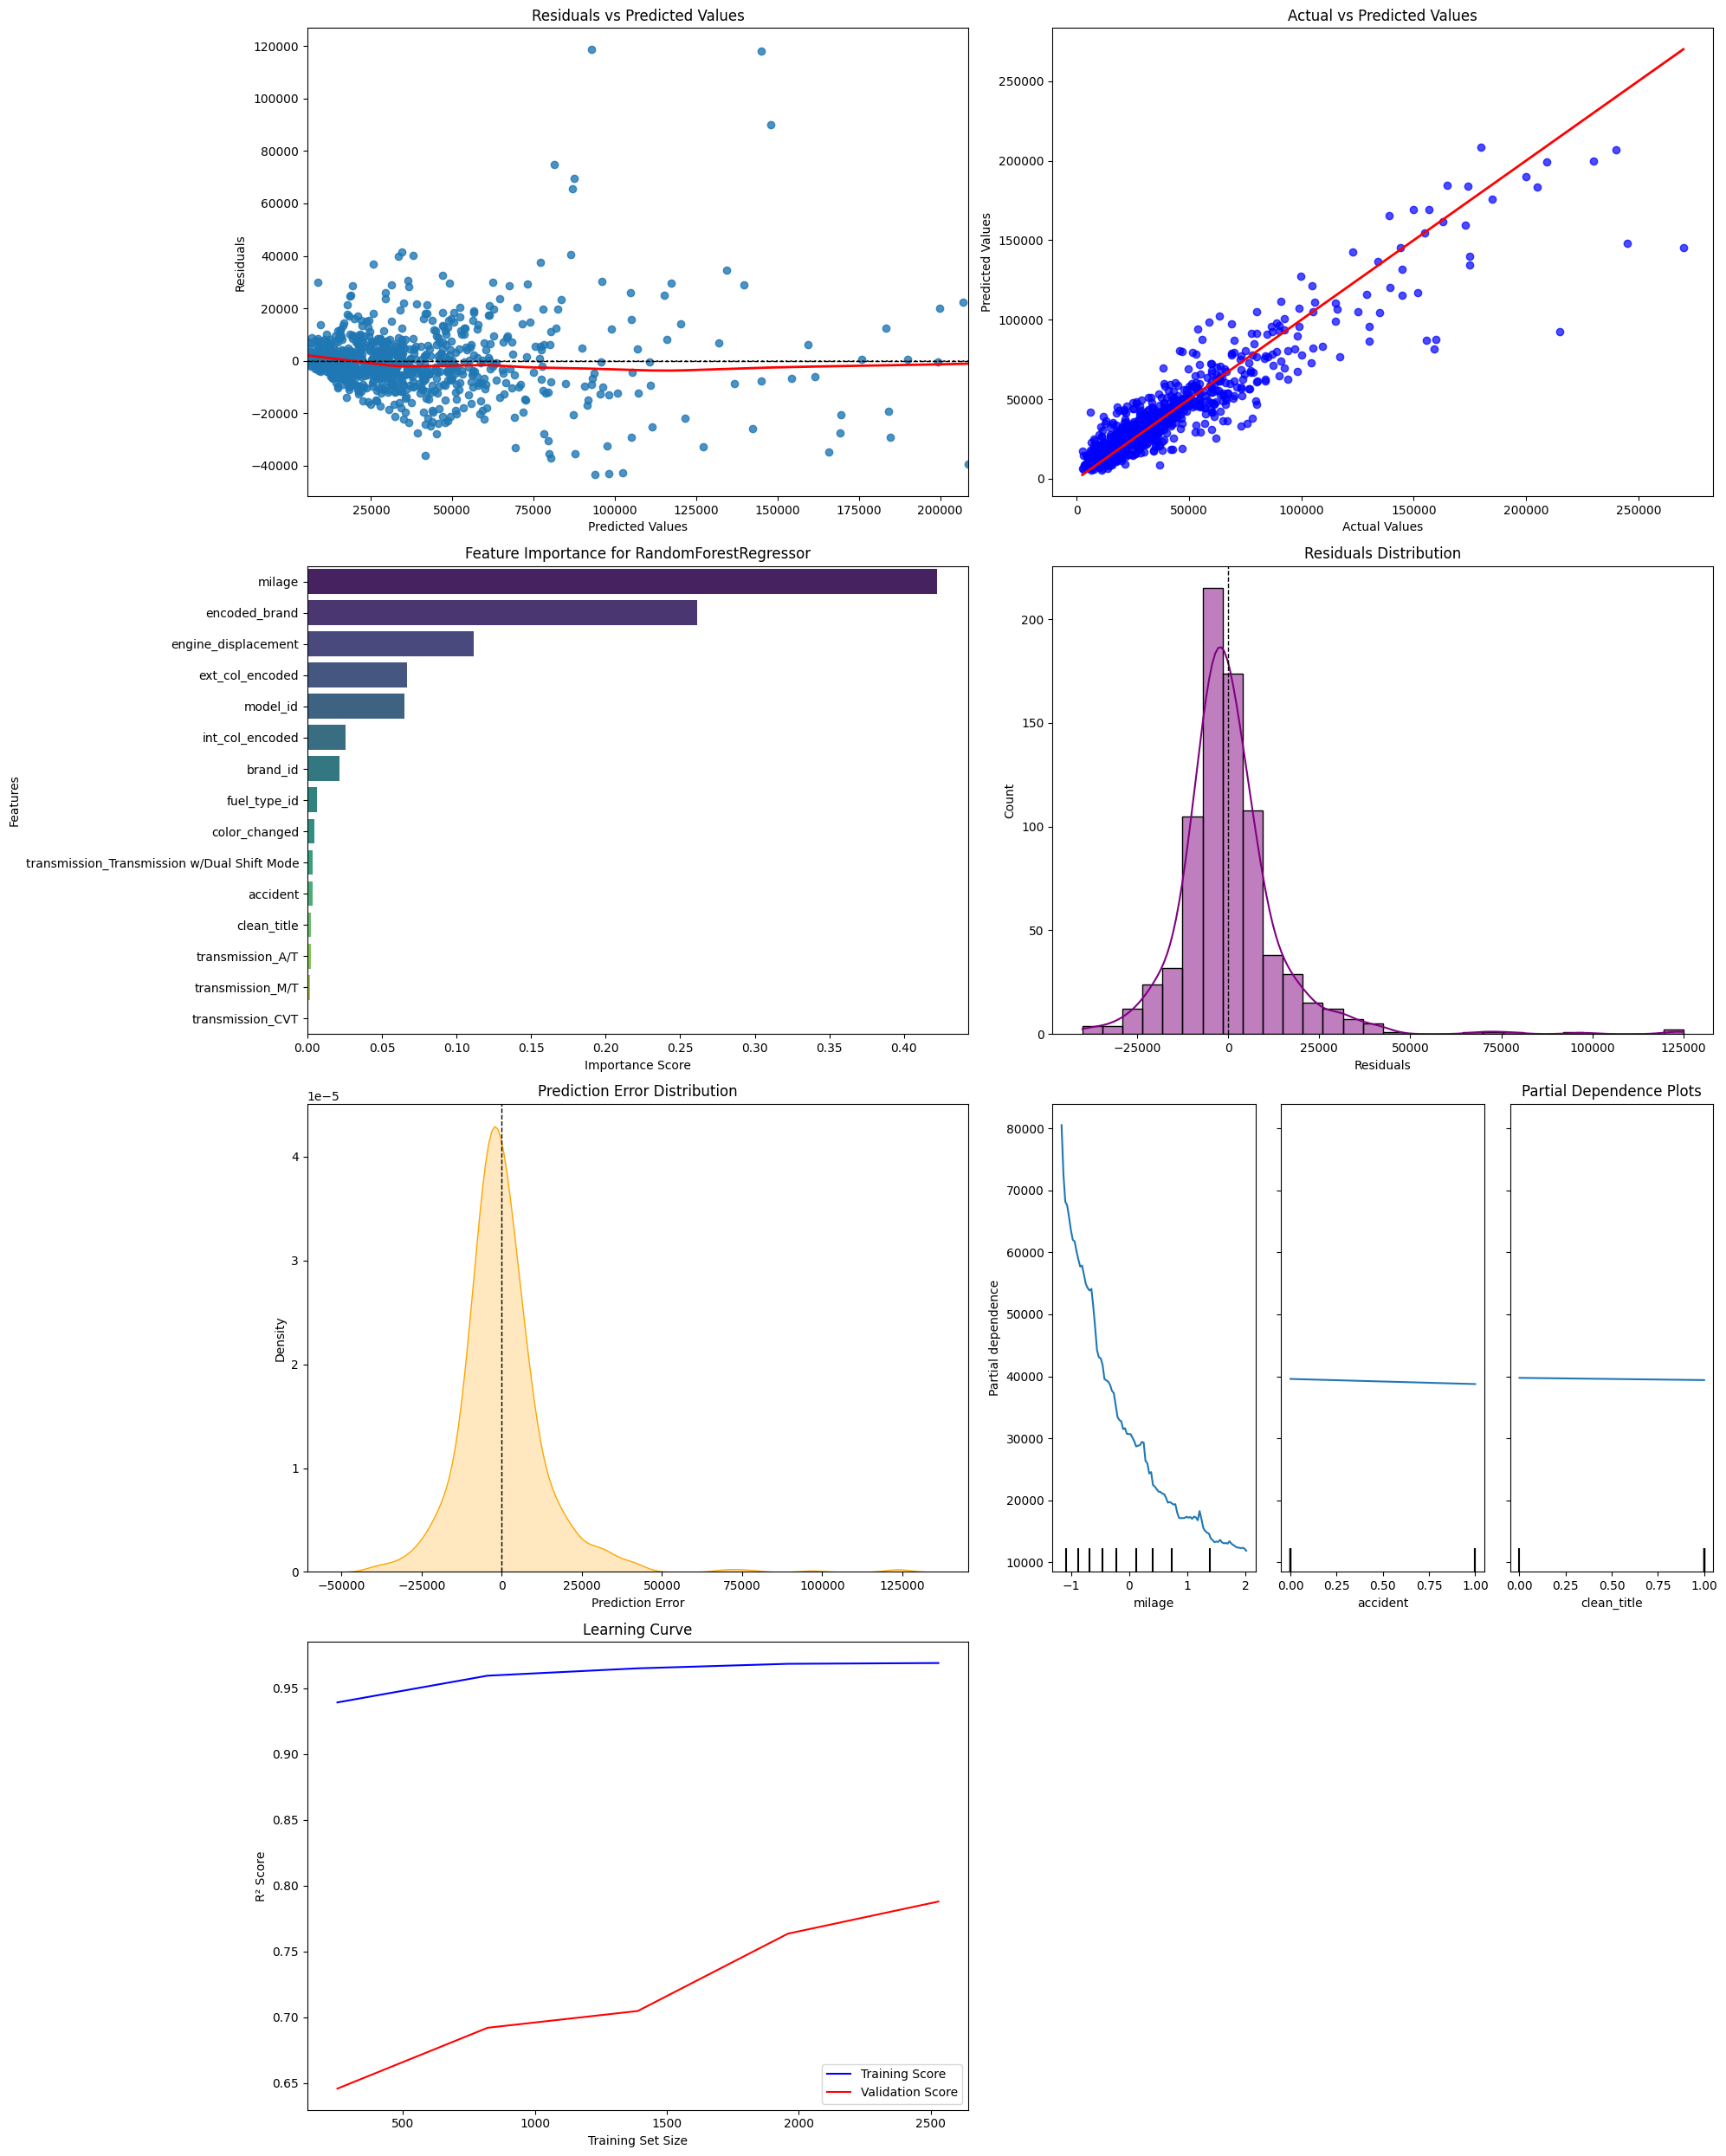

Best Result for XGBRegressor:
  Number of Selected Features: 9
  Selected Features: ['milage', 'encoded_brand', 'brand_id', 'model_id', 'fuel_type_id', 'transmission_M/T', 'engine_displacement', 'ext_col_encoded', 'int_col_encoded']
  Mean Squared Error: 167383529.085204
  R2 Score: 0.8761604968937869


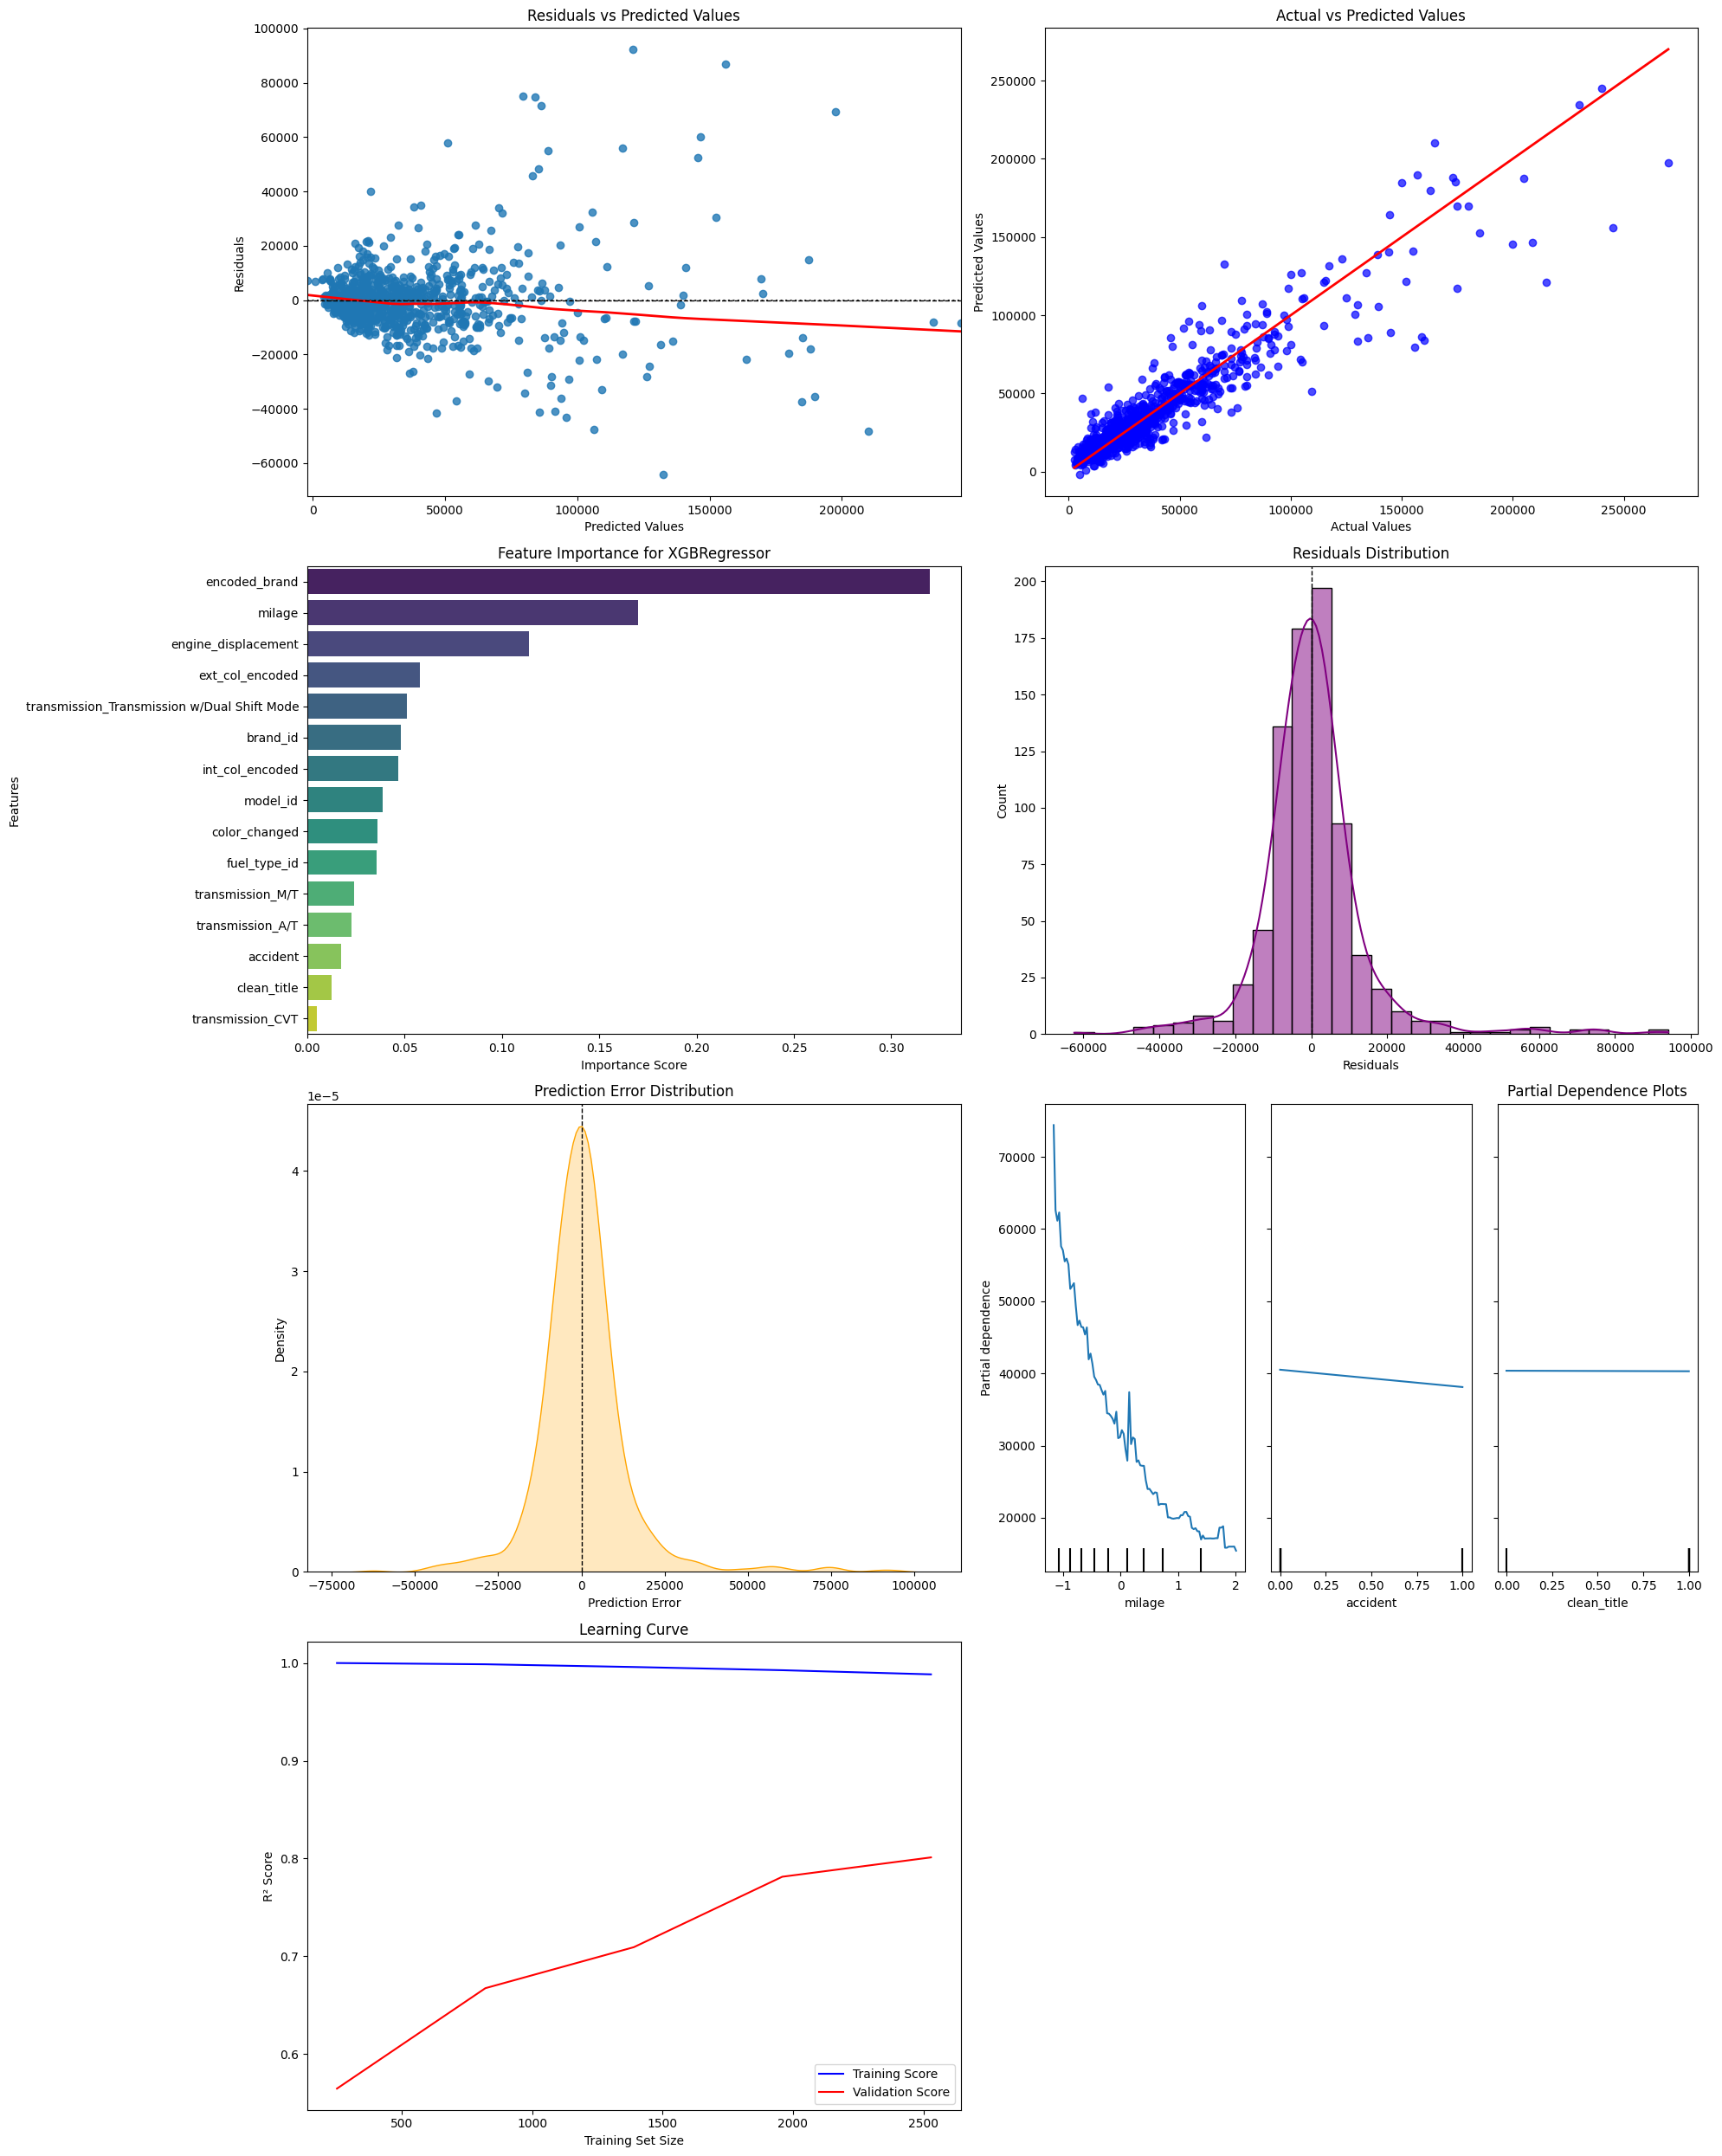

Best Result for LassoCV:
  Number of Selected Features: 7
  Selected Features: ['milage', 'accident', 'encoded_brand', 'brand_id', 'engine_displacement', 'ext_col_encoded', 'int_col_encoded']
  Mean Squared Error: 511792234.8866373
  R2 Score: 0.6213480716509641


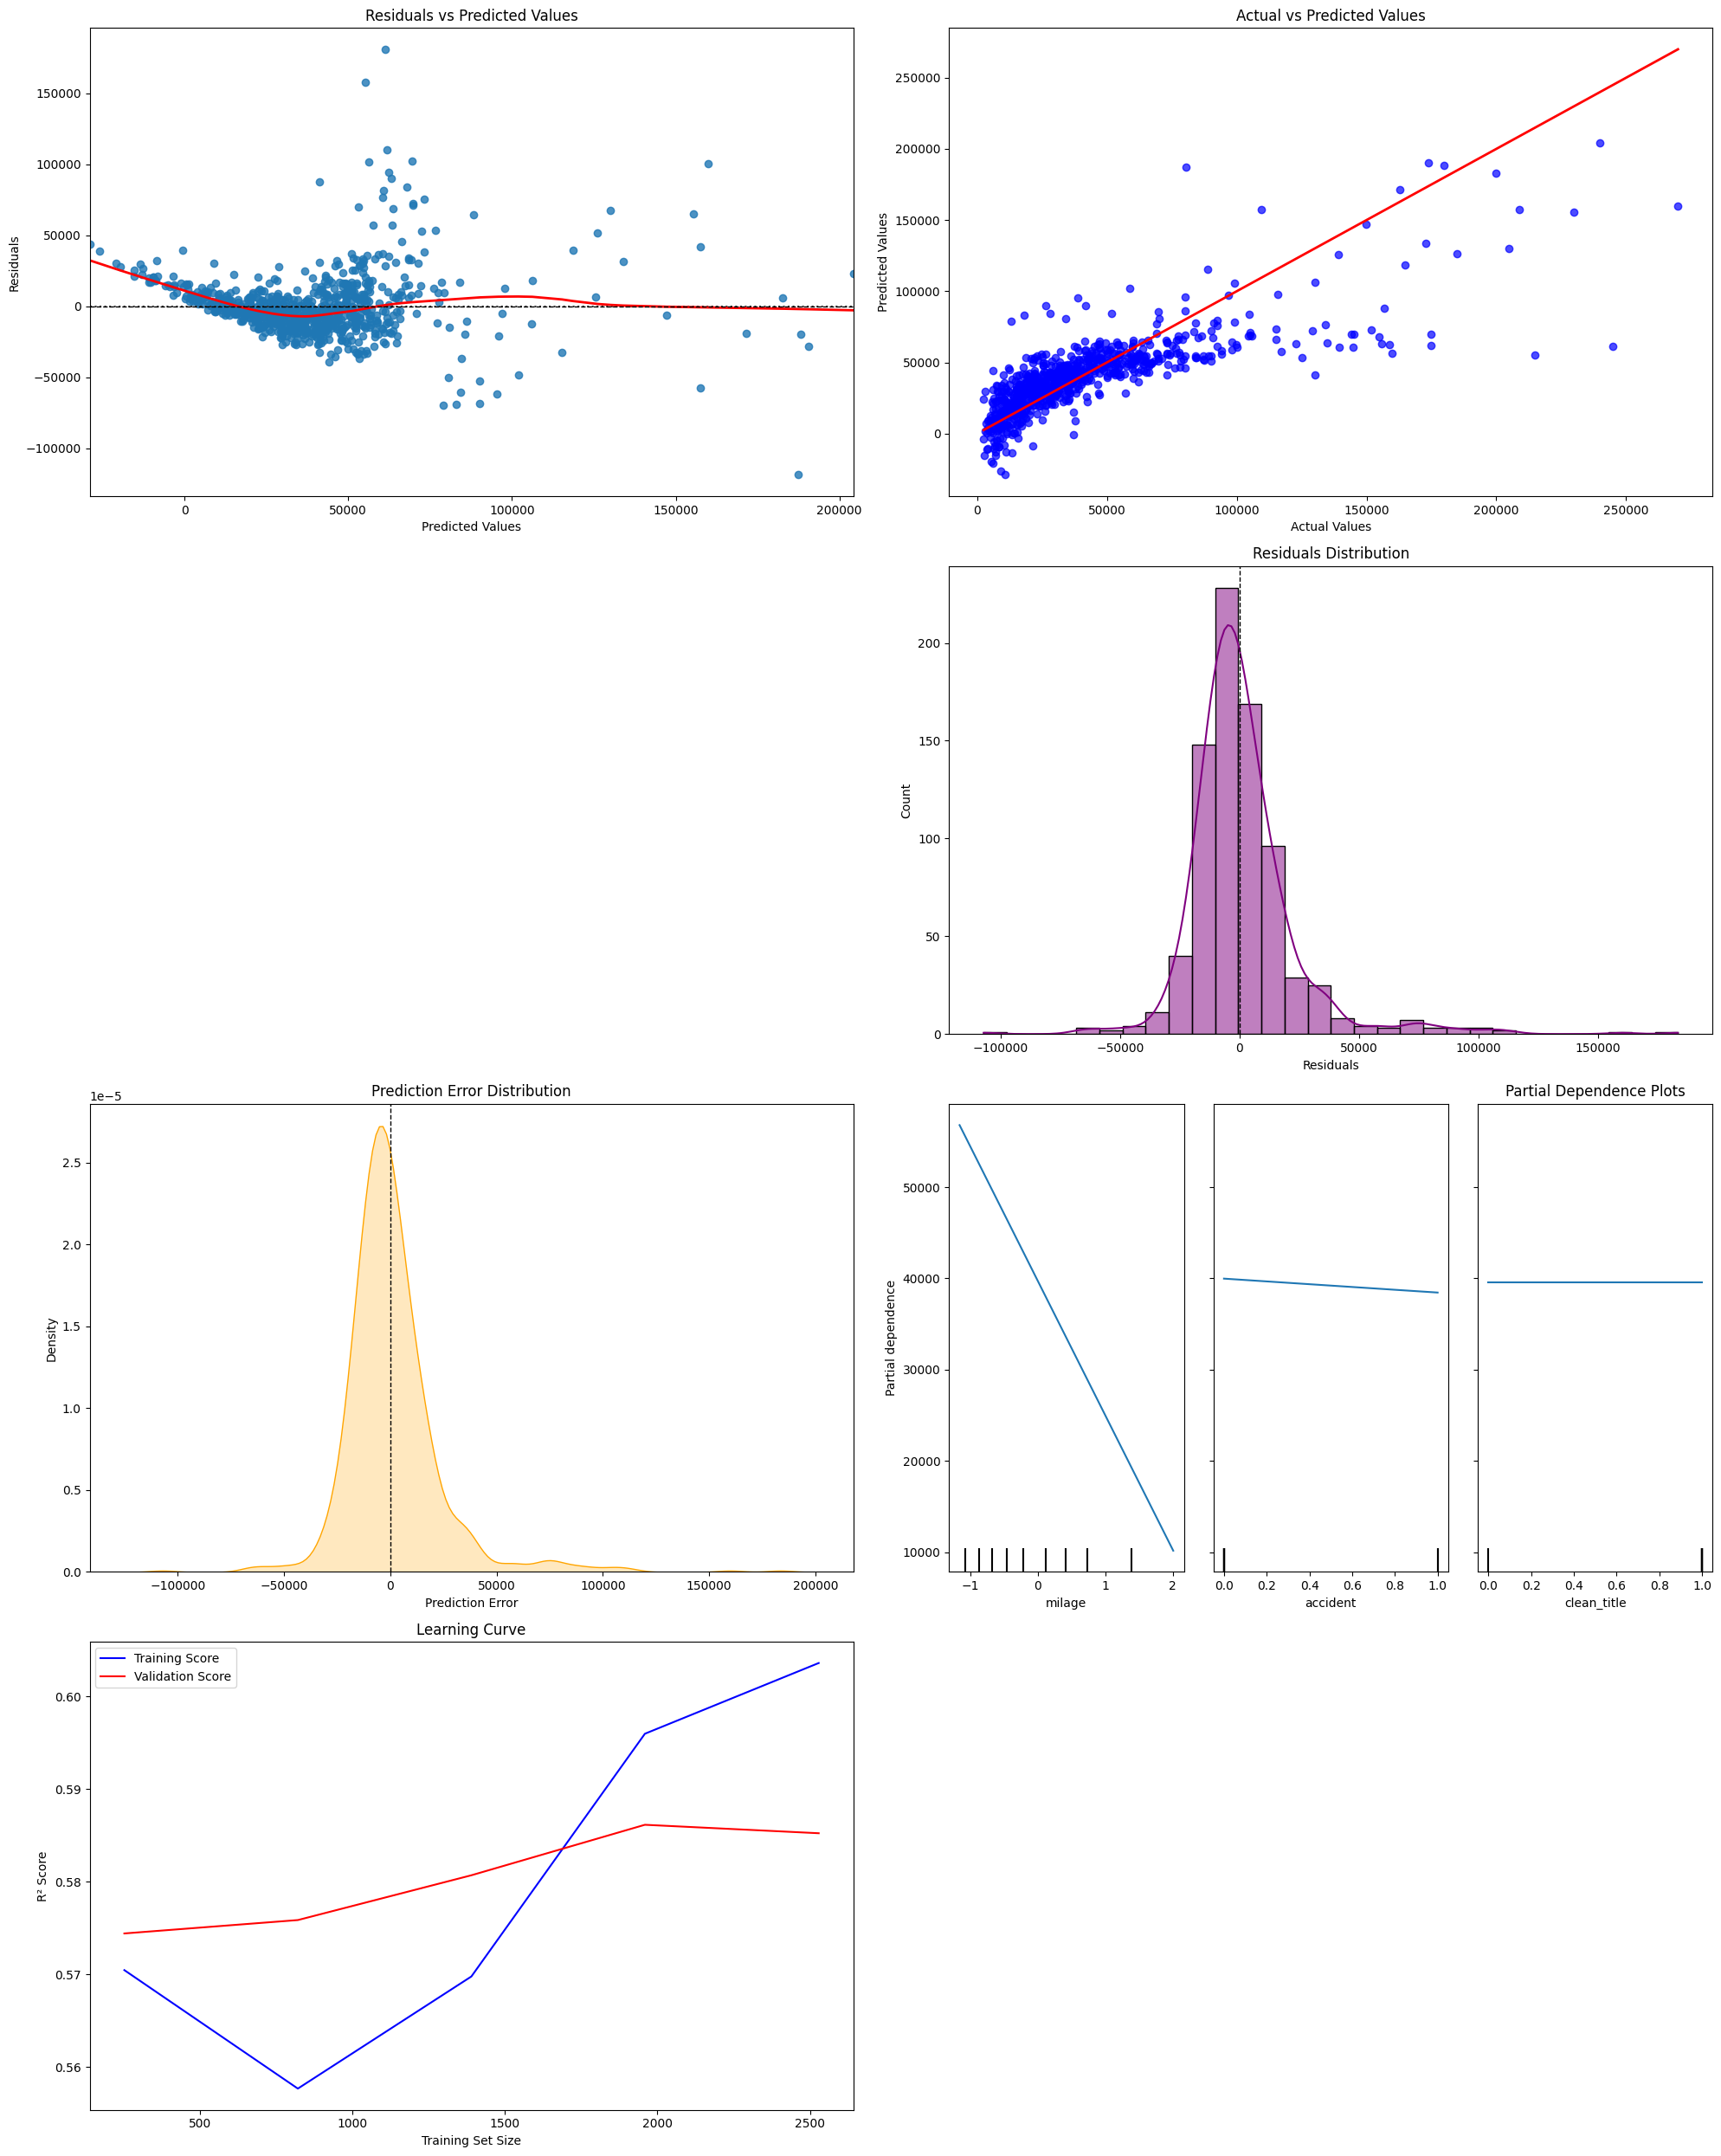

In [ ]:
from sklearn.feature_selection import RFE
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, RidgeCV, LinearRegression, LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Split your data
X = df_cleaned.drop(
    columns=['price', 'brand', 'model', 'model_year', 'fuel_type', 'engine', 'transmission',
             'ext_col', 'int_col']
)
y = df_cleaned['price']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
models = [Ridge(), RidgeCV(), LinearRegression(), RandomForestRegressor(), XGBRegressor(), LassoCV()]

# Iterate through each model
for model in models:
    best_r2 = float('-inf')  # Initialize the best R² for this model
    best_features = None
    best_mse = None
    best_n_features = None

    for i in range(1, len(X.columns) + 1):  # Iterate over the number of features to select
        rfe = RFE(estimator=model, n_features_to_select=i)
        X_train_rfe = rfe.fit_transform(X_train, y_train)

        # Train the model on selected features
        model.fit(X_train_rfe, y_train)

        # Evaluate the model
        X_test_rfe = rfe.transform(X_test)
        y_pred = model.predict(X_test_rfe)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        selected_features = X_train.columns[rfe.support_]

        # Update the best results for this model
        if r2 > best_r2:
            best_r2 = r2
            best_features = selected_features.tolist()
            best_mse = mse
            best_n_features = i

    # Create a DataFrame from X_test_rfe for visualization
    X_test_rfe_df = pd.DataFrame(X_test_rfe, columns=selected_features)  # Convert back to DataFrame

    # Add actual and predicted prices
    X_test_rfe_df['actual_price'] = y_test.values  # Use y_test instead of y_train
    X_test_rfe_df['predicted_price'] = y_pred  # Add the predicted prices

    # Print the best result for this model
    print(f"Best Result for {model.__class__.__name__}:")
    print(f"  Number of Selected Features: {best_n_features}")
    print(f"  Selected Features: {best_features}")
    print(f"  Mean Squared Error: {best_mse}")
    print(f"  R2 Score: {best_r2}")

    # Calculate residuals
    residuals = y_test - y_pred
    prediction_errors = residuals

    # Set up the figure
    plt.figure(figsize=(20, 25))

    # 1. Residual Plot
    plt.subplot(4, 2, 1)
    sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 2})
    plt.axhline(0, color='black', linestyle='--', linewidth=1)
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residuals vs Predicted Values')

    # 2. Actual vs Predicted Plot
    plt.subplot(4, 2, 2)
    plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs Predicted Values')

    # 3. Feature Importance (for tree-based models)
    if hasattr(model, "feature_importances_"):
        try:
            feature_importance = pd.Series(model.feature_importances_, index=selected_features)
            feature_importance.sort_values(ascending=False, inplace=True)

            plt.subplot(4, 2, 3)
            sns.barplot(x=feature_importance, y=feature_importance.index, palette='viridis')
            plt.title(f'Feature Importance for {model.__class__.__name__}')
            plt.xlabel('Importance Score')
            plt.ylabel('Features')
        except ValueError as e:
            print(f"Visualization skipped for {model.__class__.__name__} due to: {e}")

    # 4. Error Distribution Plot
    plt.subplot(4, 2, 4)
    sns.histplot(residuals, kde=True, bins=30, color='purple')
    plt.axvline(0, color='black', linestyle='--', linewidth=1)
    plt.xlabel('Residuals')
    plt.title('Residuals Distribution')

    # 5. Prediction Error Distribution
    plt.subplot(4, 2, 5)
    sns.kdeplot(prediction_errors, fill=True, color='orange')
    plt.axvline(0, color='black', linestyle='--', linewidth=1)
    plt.xlabel('Prediction Error')
    plt.title('Prediction Error Distribution')

    # 6. Partial Dependence Plots (PDPs) (for interpretable models)
    if hasattr(model, "predict"):
        try:
            plt.subplot(4, 2, 6)
            features_to_plot = list(range(min(3, X_test.shape[1])))  # Plot first 3 features
            PartialDependenceDisplay.from_estimator(model, X_test, features_to_plot, ax=plt.gca())
            plt.title('Partial Dependence Plots')
        except Exception as e:
            print(f"Partial Dependence Plot skipped for {model.__class__.__name__} due to: {e}")

    # 7. Learning Curve
    plt.subplot(4, 2, 7)
    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='r2')
    train_mean = train_scores.mean(axis=1)
    test_mean = test_scores.mean(axis=1)
    plt.plot(train_sizes, train_mean, label='Training Score', color='blue')
    plt.plot(train_sizes, test_mean, label='Validation Score', color='red')
    plt.xlabel('Training Set Size')
    plt.ylabel('R² Score')
    plt.title('Learning Curve')
    plt.legend()

    # Adjust layout
    plt.tight_layout()
    plt.show()
    print("=" * 60)
